In [1]:
lans <- F # forgot to commit data
suppressMessages({
    library(ixp)
    library(ggplot2)
    library(knitr)
    library(Rssa)
    library(viridis)
    library(scales)
})

In [2]:
to.xts <- function(v) xts(v, order.by=index(x))

In [3]:
xts.reconstruct <- function(s, groups) {
    r <- reconstruct(s, groups)
    to.xts(do.call("cbind", r))
}

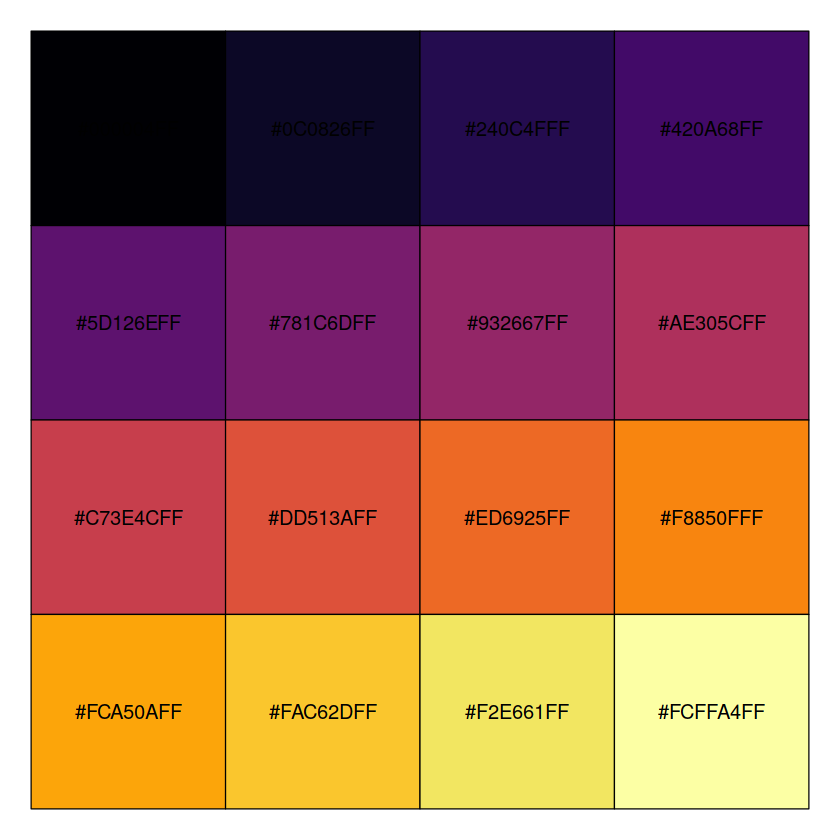

In [4]:
# colour scheme.
show_col(viridis_pal(option="inferno")(16))

In [208]:
lon2_bw <- lon2[, 1]
lon2_bw$Bandwidth <- lon2_bw*10^-9
tail(lon2_bw, 10)

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                    Bandwidth
2019-02-25 23:10:00  379.0571
2019-02-25 23:15:00  373.0398
2019-02-25 23:20:00  366.5546
2019-02-25 23:25:00  357.0273
2019-02-25 23:30:00  348.5608
2019-02-25 23:35:00  343.9601
2019-02-25 23:40:00  338.8851
2019-02-25 23:45:00  331.3145
2019-02-25 23:50:00  324.3923
2019-02-25 23:55:00  312.4267

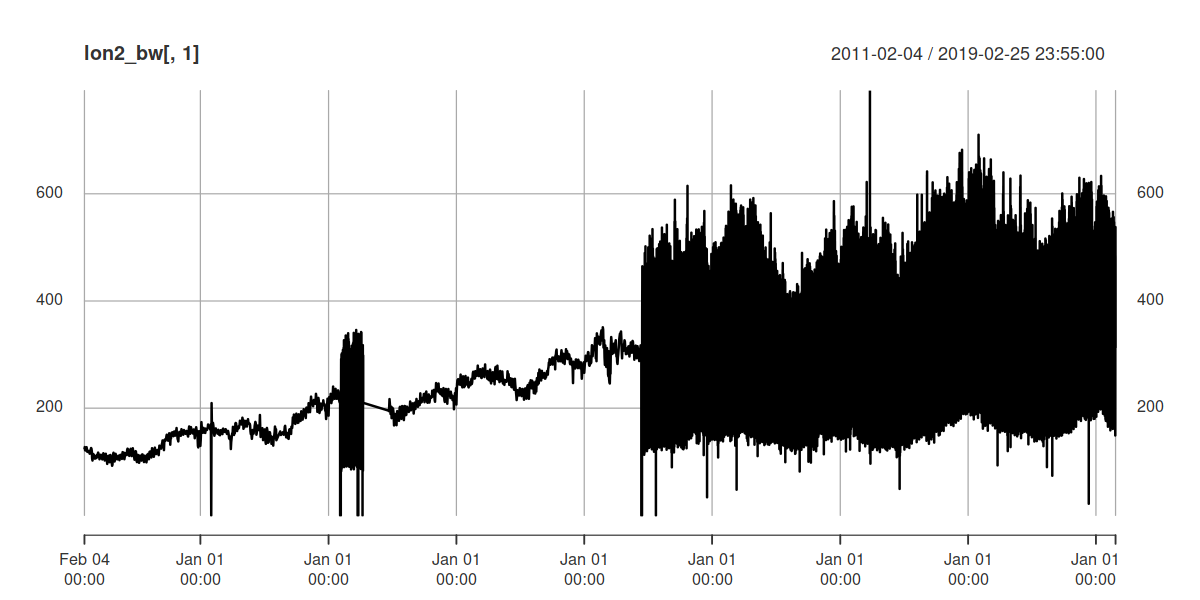

In [209]:
plot(lon2_bw[, 1])

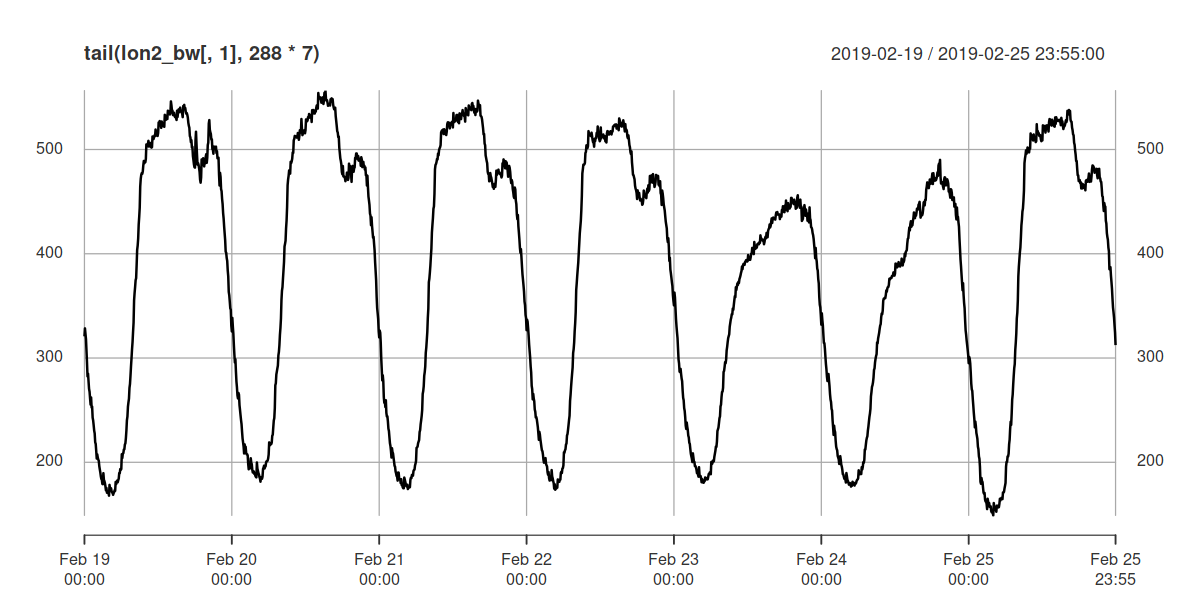

In [210]:
plot(tail(lon2_bw[, 1], 288*7))

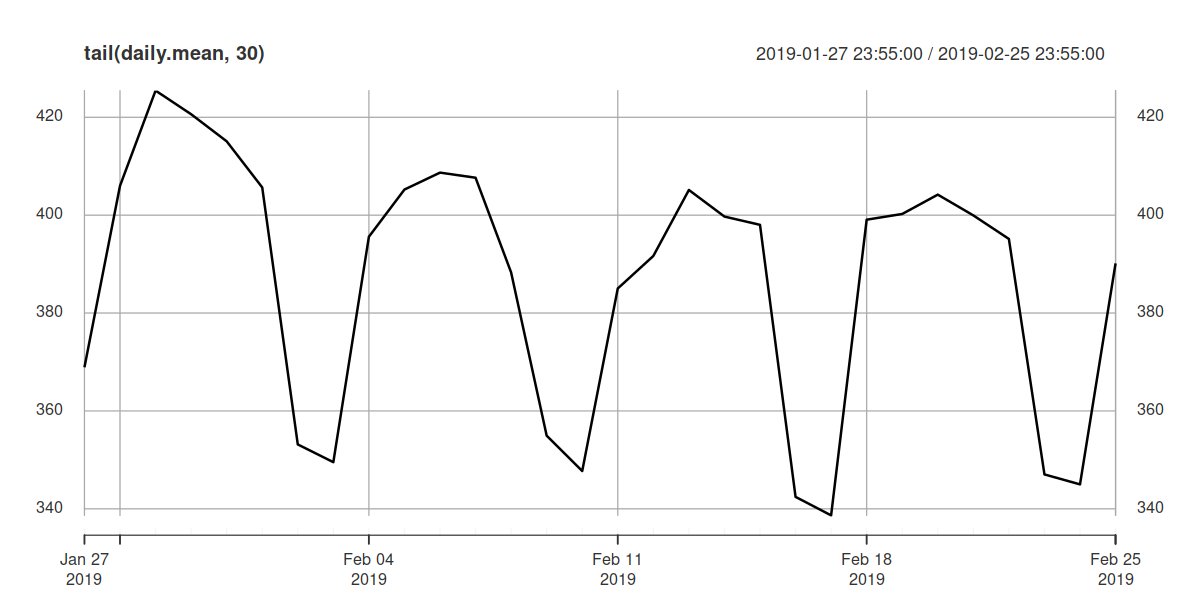

In [211]:
daily.mean <- apply.daily(lon2_bw, mean)
plot(tail(daily.mean, 30))

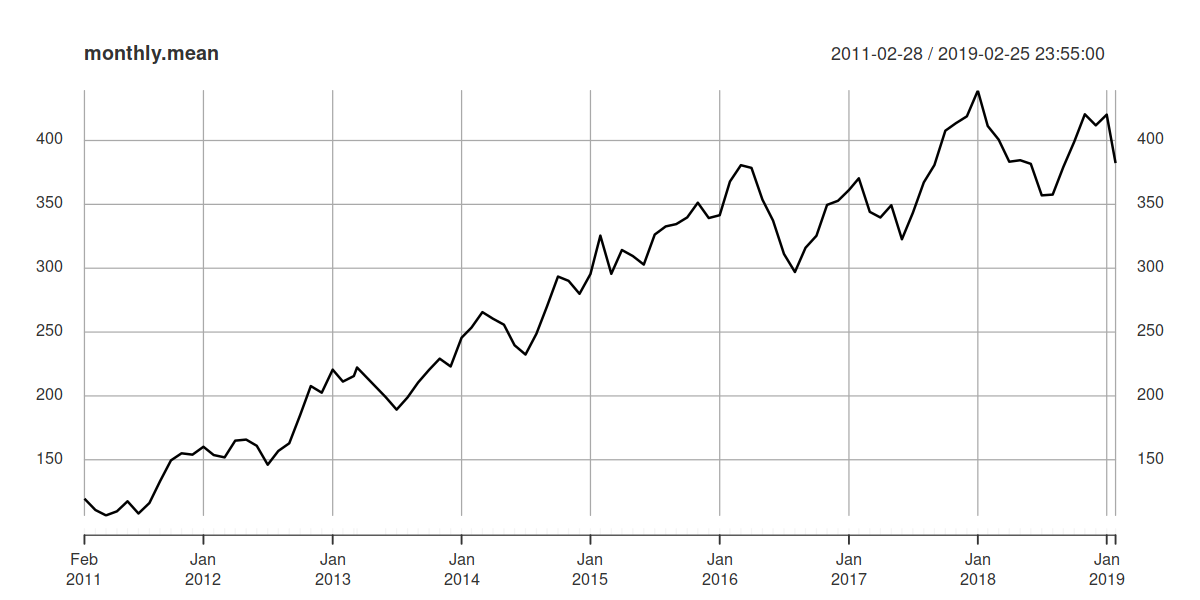

In [212]:
monthly.mean <- apply.monthly(lon2_bw, mean)
#monthly.sd <- apply.monthly(lon2_bw, sd)
plot(monthly.mean)
#lines(monthly.mean + 2*monthly.sd, col="red")
#lines(monthly.mean - 2*monthly.sd, col="red")

In [213]:
# missing 2013-05
monthly.mean

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                    Bandwidth
2011-02-28 00:00:00  119.5462
2011-03-31 00:00:00  110.6863
2011-04-30 00:00:00  106.4716
2011-05-31 00:00:00  109.6430
2011-06-30 00:00:00  117.4928
2011-07-31 00:00:00  107.9508
2011-08-31 00:00:00  116.1743
2011-09-30 00:00:00  133.1458
2011-10-31 00:00:00  149.5379
2011-11-30 00:00:00  155.0777
2011-12-31 00:00:00  154.0217
2012-01-31 00:00:00  160.1883
2012-02-29 00:00:00  153.7144
2012-03-31 00:00:00  151.8846
2012-04-30 00:00:00  164.9851
2012-05-31 00:00:00  165.8095
2012-06-30 00:00:00  160.9599
2012-07-31 00:00:00  146.1265
2012-08-30 00:00:00  156.9091
2012-09-30 00:00:00  162.9180
2012-10-31 00:00:00  185.1064
2012-11-30 00:00:00  207.7167
2012-12-31 00:00:00  202.5341
2013-01-31 00:00:00  220.5901
2013-02-28 22:00:00  211.2332
2013-03-31 23:30:00  215.5778
2013-04-09 23:00:00  222.2631
2013-06-30 00:00:00  199.0908
2013-07-31 00:00:00  189.2681
2013-08-31 00:00:00  198.8387
2013-09-30 00:00:00  210.5535
2013-10-31 00:00:00  220.4271
2013-11-30

In [194]:
# interpolate missing point.
monthly.mean <- rbind(monthly.mean, xts(mean(monthly.mean["2013-04/06"]), as.Date("2013-05-31")))
monthly.mean

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                    Bandwidth
2011-02-28 00:00:00    0.0000
2011-03-31 00:00:00    0.0000
2011-04-30 00:00:00    0.0000
2011-05-31 00:00:00    0.0000
2011-06-30 00:00:00    0.0000
2011-07-31 00:00:00    0.0000
2011-08-31 00:00:00    0.0000
2011-09-30 00:00:00    0.0000
2011-10-31 00:00:00    0.0000
2011-11-30 00:00:00    0.0000
2011-12-31 00:00:00    0.0000
2012-01-31 00:00:00    0.0000
2012-02-29 00:00:00    0.0000
2012-03-31 00:00:00    0.0000
2012-04-30 00:00:00    0.0000
2012-05-31 00:00:00  138.7820
2012-06-30 00:00:00  644.2168
2012-07-31 00:00:00  662.6903
2012-08-30 00:00:00  690.2494
2012-09-30 00:00:00  727.7678
2012-10-31 00:00:00  773.6996
2012-11-30 00:00:00  796.1644
2012-12-31 00:00:00  785.4697
2013-01-31 00:00:00  817.2514
2013-02-28 22:00:00  835.4415
2013-03-31 23:30:00  706.3626
2013-04-09 23:00:00  802.1191
2013-05-31 00:00:00  796.5567
2013-06-30 00:00:00  790.9944
2013-07-31 00:00:00  783.0134
2013-08-31 00:00:00  833.1600
2013-09-30 00:00:00  885.5773
2013-10-31

In [12]:
#write.csv(data.frame(ts=index(monthly.mean), bw=as.vector(monthly.mean$Bandwidth)), "/tmp/lon2_monthly.csv", row.names=F)

In [229]:
# https://www.ons.gov.uk/businessindustryandtrade/itandinternetindustry/bulletins/internetusers/2018
# 2012-2018
lfs.internet.use.london <- c(5461, 5597, 5678, 6037, 6271, 6509, 6591)
lon.use <- diff(lfs.internet.use.london) / head(lfs.internet.use.london, -1)

lfs.internet.use.uk <- c(40764, 42243, 43457, 44671, 45917, 46742, 47560)
uk.use <- diff(lfs.internet.use.uk) / head(lfs.internet.use.uk, -1)

lfs.internet.use <- data.frame(year=2013:2018, lon.change=lon.use, uk.change=uk.use,
                               lon.v=tail(lfs.internet.use.london, -1),
                               uk.v=tail(lfs.internet.use.uk, -1))
lfs.internet.use

year,lon.change,uk.change,lon.v,uk.v
2013,0.02490386,0.03628201,5597,42243
2014,0.01447204,0.02873849,5678,43457
2015,0.06322649,0.02793566,6037,44671
2016,0.03876097,0.02789282,6271,45917
2017,0.03795248,0.01796720,6509,46742
2018,0.01259794,0.01750032,6591,47560


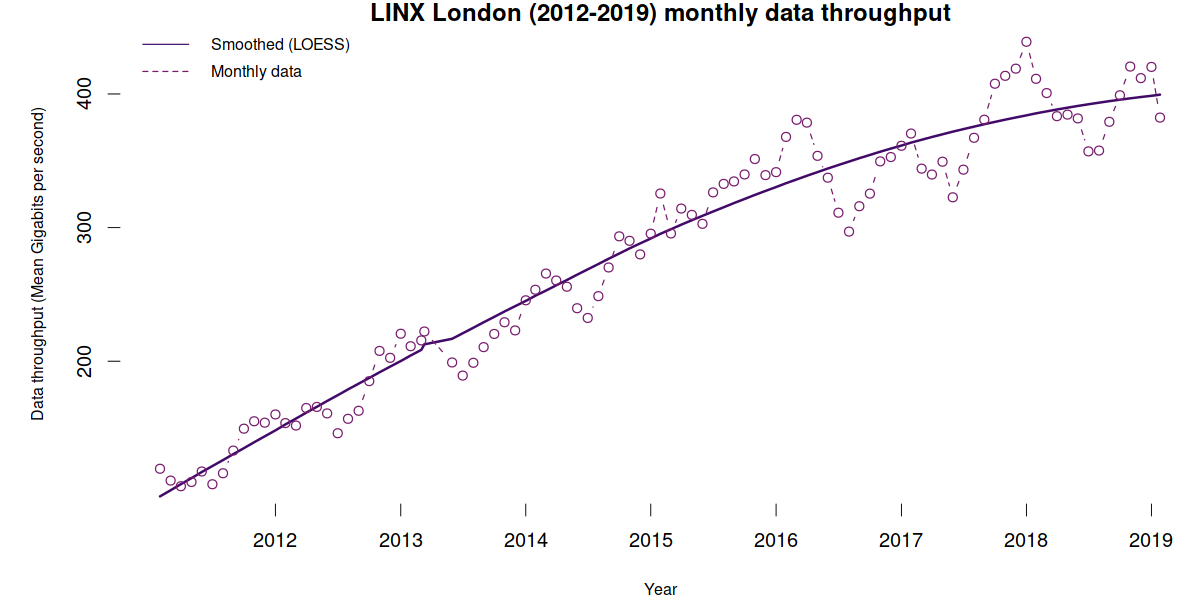

In [280]:
options(repr.plot.width=10, repr.plot.height=5)
yearly.mean <- apply.yearly(monthly.mean, mean)
bw.df <- data.frame(ts=index(monthly.mean), bw=as.vector(monthly.mean$Bandwidth))
#yearly.mean
#bw.df <- data.frame(ts=index(yearly.mean), bw=as.vector(yearly.mean$Bandwidth))
bw.df$smoothed <- predict(loess(bw ~ index(ts), bw.df, span=1))
jan.idx <- which(format.Date(bw.df$ts, "%m") == "01")
jan.at <- bw.df[jan.idx, 1]
years <- format.Date(jan.at, "%Y")
#png(filename="img/ixp_daily.png", width = 614, height= 307)
par(mar=c(4,5,1,0))
plot(bw.df[, c(1, 3)], ylim=range(monthly.mean$Bandwidth), xlab="Year", cex.lab=0.8, ylab="Data throughput (Mean Gigabits per second)", type="l", bty="n", axes=F, lty=1, col="#420a68", lwd=2,
     main="LINX London (2012-2019) monthly data throughput")
lines(bw.df[, 1:2], lty=2, col="#781c6d", type="b")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=1, at=jan.at, labels=years)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=3, at=c(200, 300, 400), labels=c("200", "300", "400"))
legend("topleft", c("Smoothed (LOESS)", "Monthly data"), lty=1:2, cex=0.8, col=c("#420a68", "#781c6d"), bty="n", y.intersp=2)
#dev.off()

#yearly.mean
# 2011 - 2019
yearly.mean.v <- as.vector(yearly.mean$Bandwidth)
tot.internet.use <- cbind(lfs.internet.use, lon2=tail(head(diff(yearly.mean.v) / head(yearly.mean.v, -1), -1), -1))
tot.internet.use$lon2.v <- head(tail(yearly.mean.v, -2), -1)

In [233]:
tot.internet.use

year,lon.change,uk.change,lon.v,uk.v,lon2,lon2.v
2013,0.02490386,0.03628201,5597,42243,0.26448578,212.7342
2014,0.01447204,0.02873849,5678,43457,0.22820351,261.2809
2015,0.06322649,0.02793566,6037,44671,0.23338514,322.2600
2016,0.03876097,0.02789282,6271,45917,0.06321013,342.6301
2017,0.03795248,0.01796720,6509,46742,0.07475661,368.2439
2018,0.01259794,0.01750032,6591,47560,0.06946953,393.8257


In [251]:
# 2013 - 2015, 2016 - 2018 MoM growth
with(tot.internet.use, {
  print(paste(mean(uk.change[1:3]), mean(uk.change[4:6])))
  print(paste(mean(lon2[1:3]), mean(lon2[4:6])))  
})

[1] "0.0309853877655038 0.0211201129896991"
[1] "0.242024808283346 0.069145424217044"


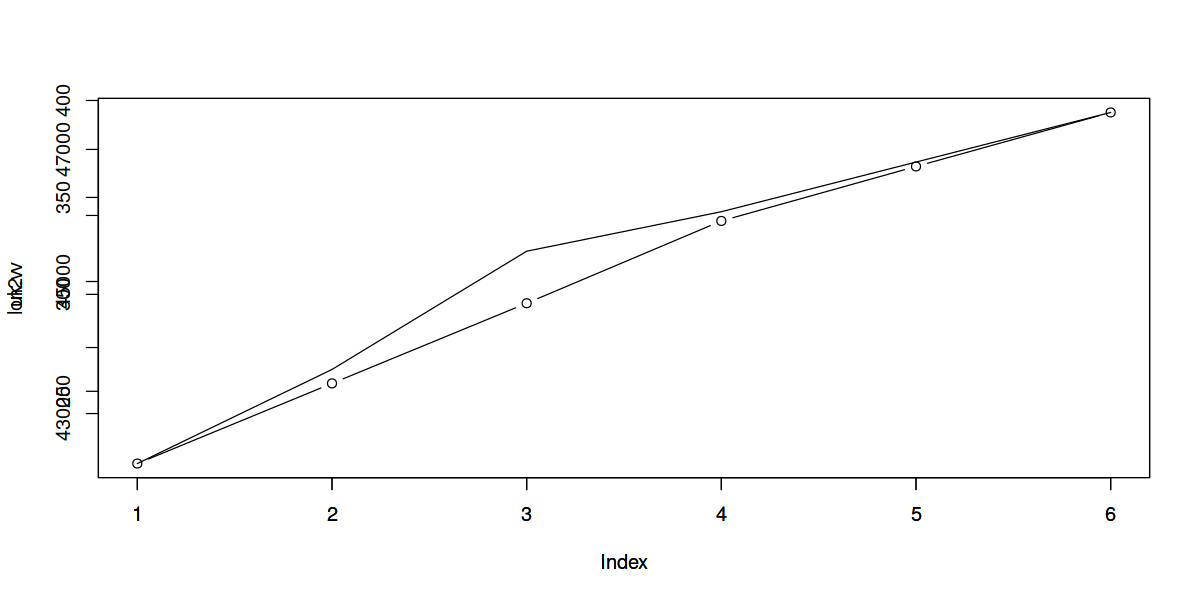

In [238]:
with(tot.internet.use, {
    plot(uk.v, type="b")
    par(new=T)
    plot(lon2.v, type="l")
})

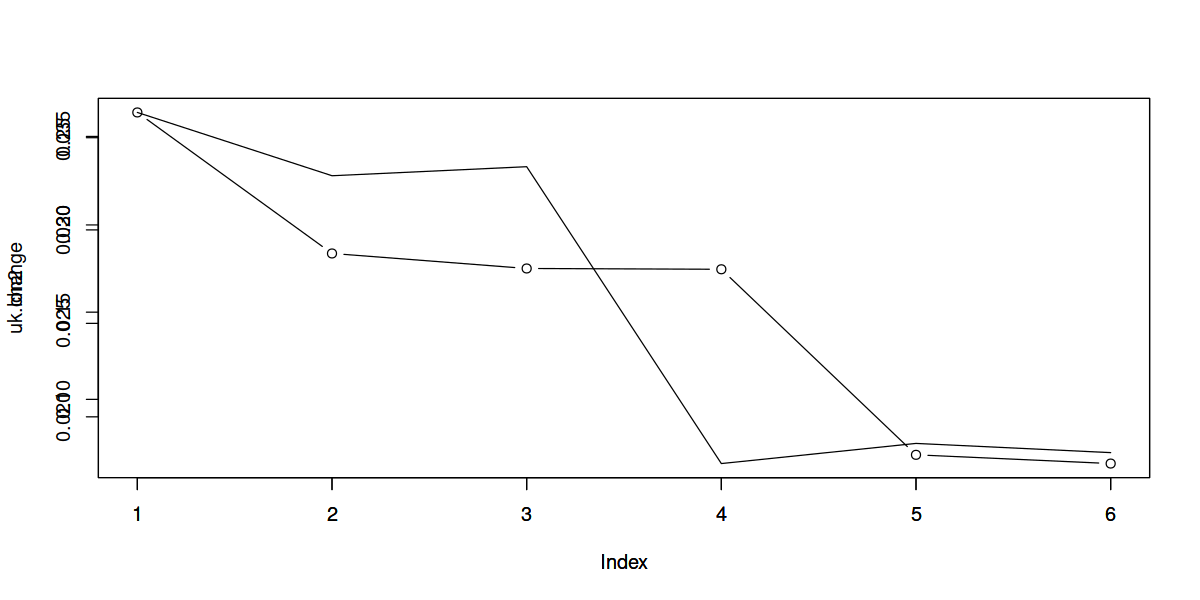

In [246]:
with(tot.internet.use, {
    plot(uk.change, type="b")
    par(new=T)
    plot(lon2, type="l")
})

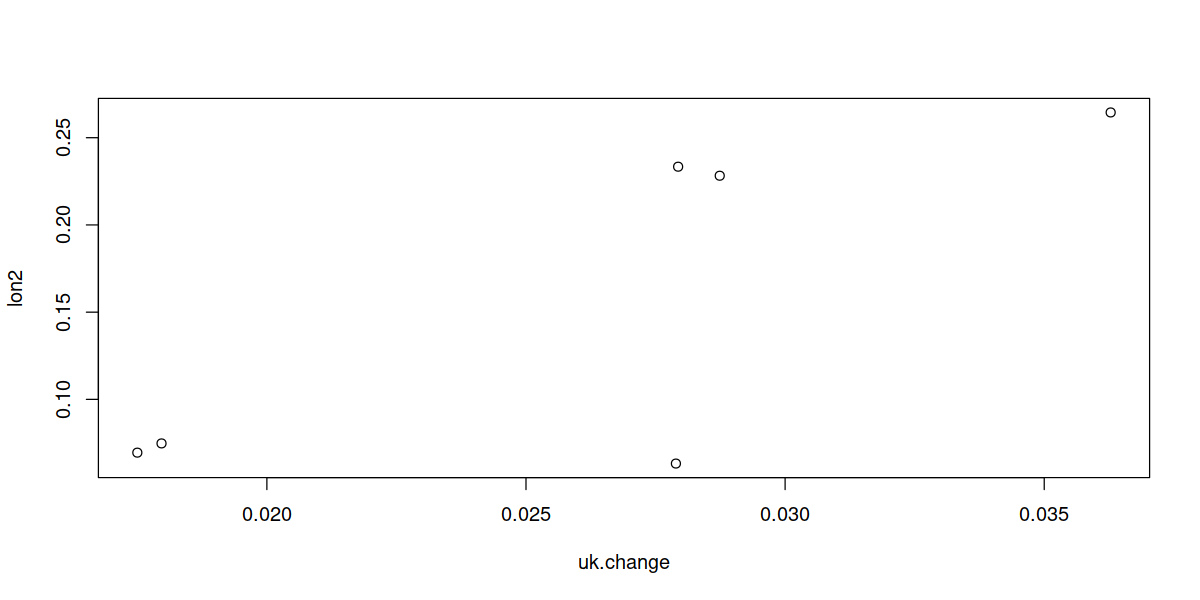

In [218]:
with(tot.internet.use, plot(uk.change, lon2))

In [220]:
# lon2 vs uk internet use p = 0.06..
summary(with(tot.internet.use, lm(uk.change ~ lon2)))


Call:
lm(formula = uk.change ~ lon2)

Residuals:
        1         2         3         4         5         6 
 0.003849 -0.001569 -0.002675  0.007252 -0.003350 -0.003507 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.016937   0.004185   4.047   0.0155 *
lon2        0.058587   0.023461   2.497   0.0670 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005014 on 4 degrees of freedom
Multiple R-squared:  0.6092,	Adjusted R-squared:  0.5115 
F-statistic: 6.236 on 1 and 4 DF,  p-value: 0.06697


In [239]:
summary(with(tot.internet.use, lm(uk.v ~ lon2.v)))


Call:
lm(formula = uk.v ~ lon2.v)

Residuals:
       1        2        3        4        5        6 
 202.846   -9.395 -586.885   60.667  133.163  199.604 

Coefficients:
             Estimate Std. Error t value   Pr(>|t|)    
(Intercept) 35790.287    708.727   50.50 0.00000092 ***
lon2.v         29.379      2.195   13.38    0.00018 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 334.3 on 4 degrees of freedom
Multiple R-squared:  0.9782,	Adjusted R-squared:  0.9727 
F-statistic: 179.1 on 1 and 4 DF,  p-value: 0.0001802


In [14]:
if(lans){
    lon1.lans <- read.csv("/home/phil/tron/linx/lon1/ixlan.csv", header=F)
    lon1.conn <- read.csv("/home/phil/tron/linx/lon1/connectivity.csv", header=F)
    lon1.lans <- cbind(lon1.lans, lon1.conn)
    lon1.lans <- lon1.lans[!duplicated(lon1.lans[, 3]), ]
    lon1.lans$V5 <- factor(lon1.lans$V5, ordered=T, levels=c("10 Tbps+", "1 Tbps+", "500-1000 Gbps", "300-500 Gbps", "200-300 Gbps", "100-200 Gbps", "50-100 Gbps", "20-50 Gbps", "10-20Gbps", "5-10Gbps", "1-5Gbps", "100-1000Mbps", "20-100Mbps", "0-20 Mbps", ""))
    data.frame(summary(lon1.lans$V5))
    nrow(lon1.lans)
}

In [15]:
if(lans){
    lon2.lans <- read.csv("/home/phil/tron/linx/lon2/ixlan.csv", header=F)
    lon2.conn <- read.csv("/home/phil/tron/linx/lon2/connectivity.csv", header=F)
    lon2.lans <- cbind(lon2.lans, lon2.conn)
    lon2.lans <- lon2.lans[!duplicated(lon2.lans[, 3]), ]
    lon2.lans$V5 <- factor(lon2.lans$V5, ordered=T, levels=c("10 Tbps+", "1 Tbps+", "500-1000 Gbps", "300-500 Gbps", "200-300 Gbps", "100-200 Gbps", "50-100 Gbps", "20-50 Gbps", "10-20Gbps", "5-10Gbps", "1-5Gbps", "100-1000Mbps", "20-100Mbps", "0-20 Mbps", ""))
    data.frame(summary(lon2.lans$V5))
    nrow(lon2.lans)
}

In [16]:
if(lans){
    peers <- cbind(head(lon1.lans[order(lon1.lans[, 7], decreasing=T), c(3,5)], 20),
                   head(lon2.lans[order(lon2.lans[, 7], decreasing=T), c(3,5)], 20))
    colnames(peers) <- rep(c("Organisation", "Traffic levels"), 2)
    rownames(peers) <- NULL
    peers
}

In [17]:
if(lans) kable(peers)

In [18]:
if(lans) head(lans[order(lans[, 5], decreasing=F), c(3,5,6,7)], 20)

In [19]:
weekly_heatmap <- function(ts, year, col.scheme="inferno", daily=F, border=NA, title="") {
  sub_year <- ts[year]
  if(daily) {
    avg_by <- weekdays(index(sub_year))
    ord_by <- rev(c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday",
                    "Friday", "Saturday"))
  } else {
    avg_by <-sub_year$MsM
    ord_by <- 0:1435
  }
  x <- with(sub_year, {
    tapply(sub_year$Bandwidth,
           list(factor(strftime(index(sub_year), "%W")), avg_by), mean)
  })
  df <- my_melt(x)
  df$col <- ordered(df$col, ord_by)
  g <- ggplot(df, aes(x=row, y=factor(col)))
  g <- g + geom_tile(aes(fill=val), col=border) + scale_fill_viridis(option=col.scheme)
  g <- g + guides(fill=F) + theme(axis.title.y=element_blank(),
                                  axis.title.x=element_blank(),
                                  text=element_text(size=10, family = "serif"),
                                  axis.text.x = element_text(angle = 90, vjust = 0.5),
                                  plot.title = element_text(hjust = 1))
  g <- g + ggtitle(title)
  g
}


In [20]:
col="inferno"
#col="magma"
#col="plasma"
#col="viridis"

null device 
          1

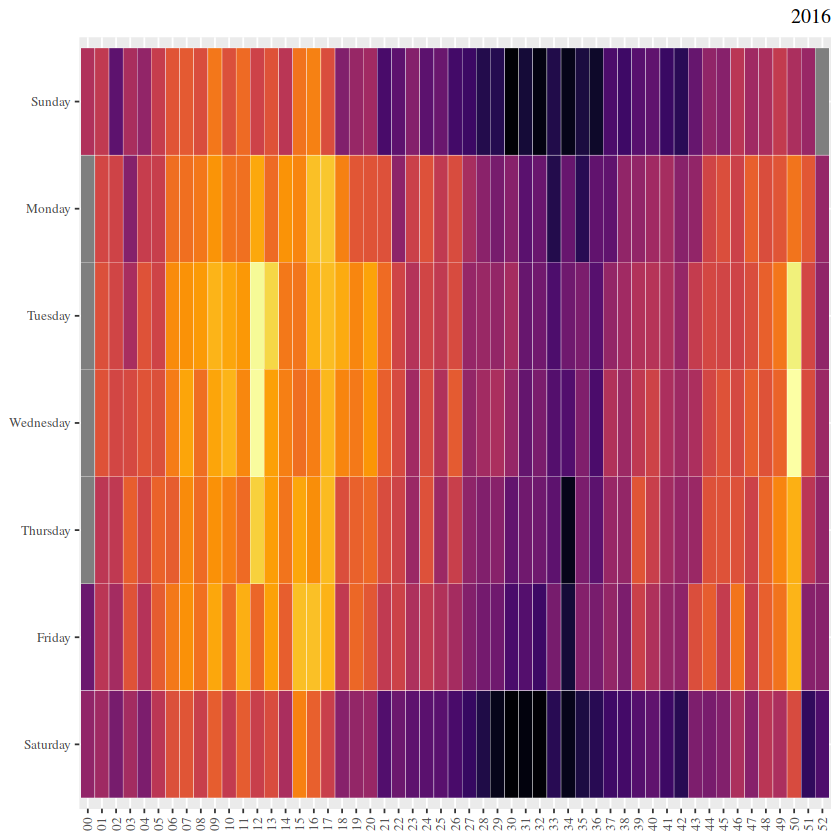

In [21]:
#png(filename="/tmp/4.png", width = 613, height= 113)
weekly_heatmap(lon2_bw, year = "2016", daily = T, border="#ffffff", col.scheme=col, title="2016")
dev.off()

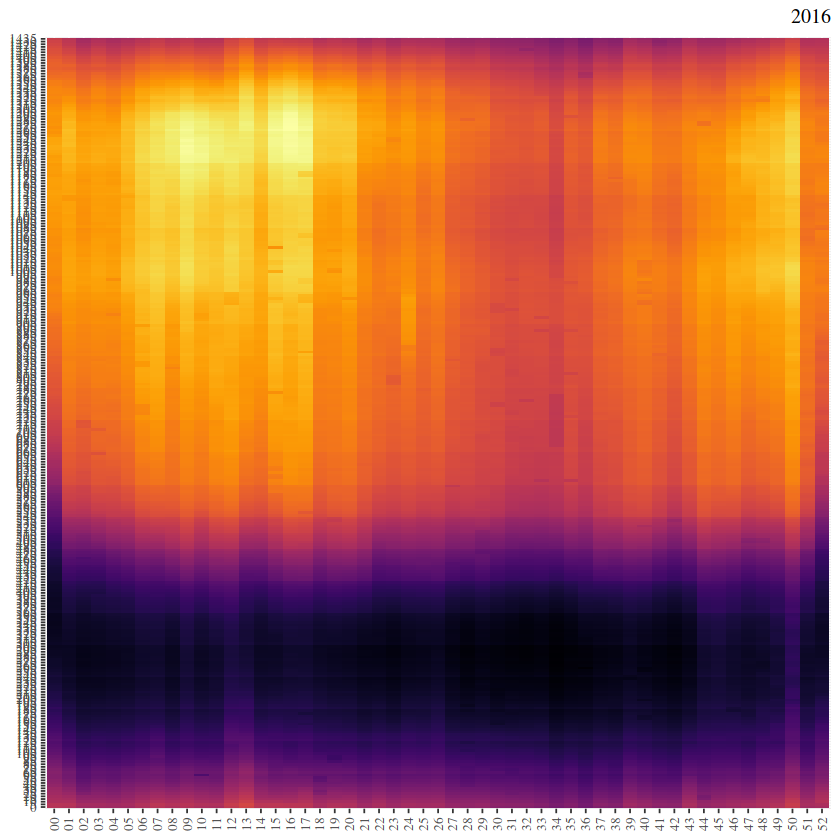

In [22]:
weekly_heatmap(lon2, year = "2016", col.scheme=col, title="2016")

In [23]:
ts_heatmap <- function(ts, col.scheme="inferno") {
  g <- ggplot(ts, aes(x=strftime(index(ts), format="%D"), y=factor(MsM)))
  g <- g + geom_tile(aes(fill=Bandwidth)) + scale_fill_viridis(option=col.scheme)
  g <- g + guides(fill=F) + theme(axis.title.y=element_blank(),
                                  axis.title.x=element_blank(),
                                  text=element_text(size=10, family = "serif"),
                                  axis.text.x = element_text(angle = 90, vjust = 0.5),
                                  plot.title = element_text(hjust = 1),
                                  axis.text.y = element_blank())
  g
}

null device 
          1

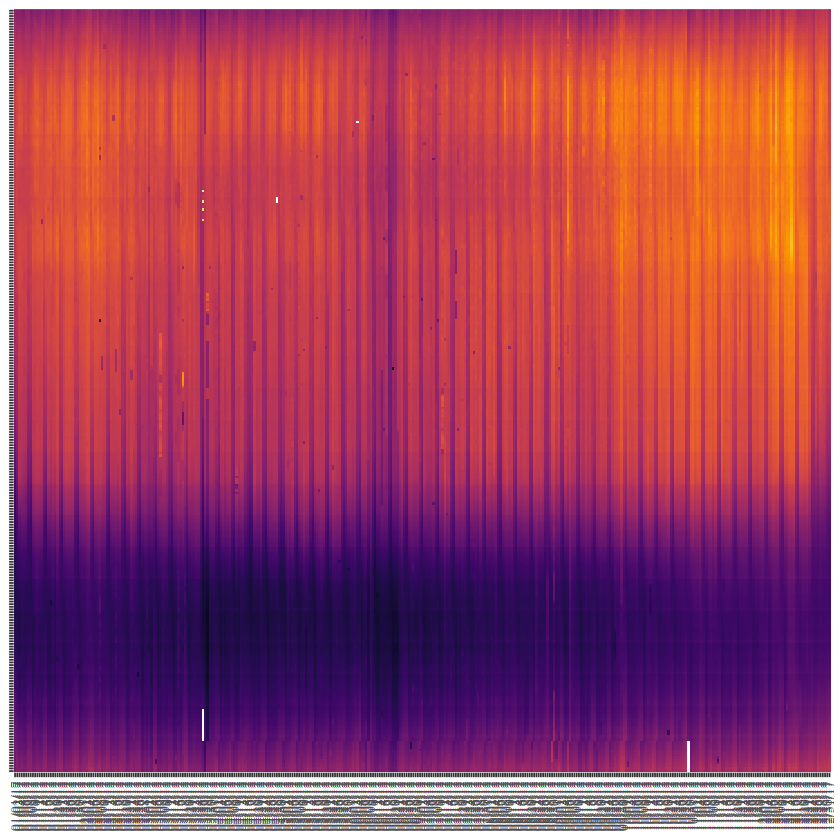

In [24]:
#png(filename="/tmp/x.png", width = 10000, height= 1024)
ts_heatmap(ts = lon2["2017"])
dev.off()

null device 
          1

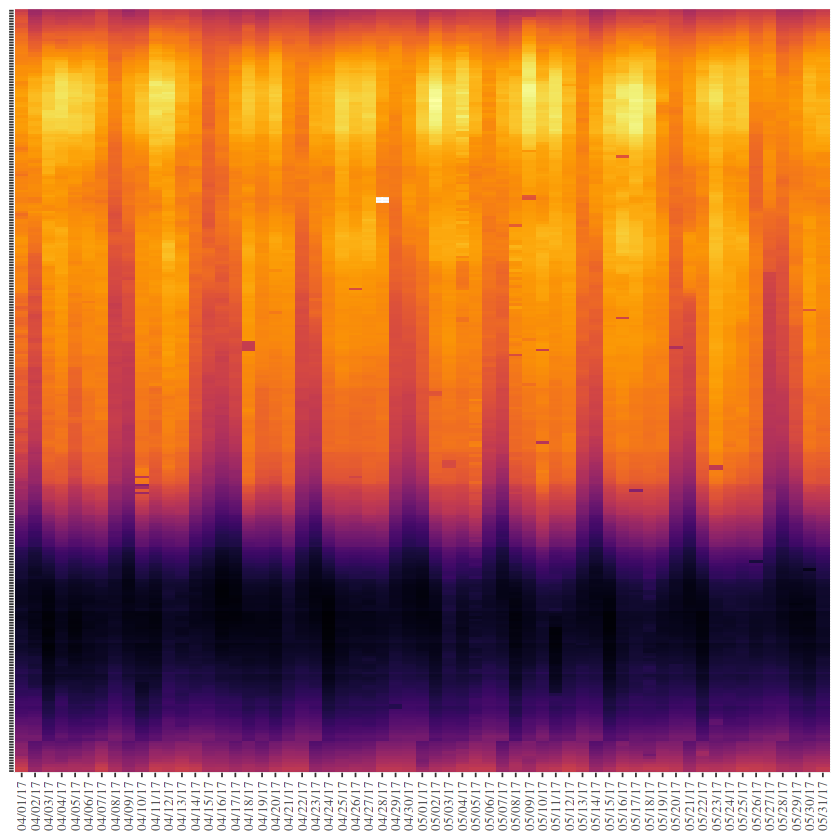

In [25]:
#png(filename="/tmp/x.png", width = 800, height = 400)
ts_heatmap(ts = lon2["2017-04/05"])
dev.off()

In [26]:
plot.wcor <- function(w, pallete="viridis") {
    stopifnot(pallete %in% c("viridis", "magma", "plasma", "inferno", "cividis"))
    my_melt <- function(x) {
      row_names <- rep(rownames(x), ncol(x))
      col_names <- unlist(lapply(colnames(x), function(cn) rep(cn, nrow(x))))
      melt_vals <- as.vector(x) # R does this in column order.
      data.frame(row=row_names, col=col_names, val=melt_vals)
    }              
    w <- my_melt(w)
    groups <- 1:nrow(w)
    g <- ggplot(w, aes(x=factor(row, levels=paste0("F", groups)), 
                       y=factor(col, levels=paste0("F", groups))))
    g <- g + geom_tile(aes(fill=val), colour="#000000", size=0.1, show.legend=F)
    g <- g + scale_fill_viridis(option=pallete)
    g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
}

In [27]:
plot.component.norms <- function(s, lim) {
    sigma <- s$sigma
    sigma <- sigma/sum(sigma)
    if(!missing(lim)) sigma <- head(sigma, lim)
    plot(sigma, type="l", xaxt = "n")
    axis(1, 1:length(sigma))
}

In [28]:
s <- ssa(as.vector(monthly.mean$Bandwidth))
summary(s)


Call:
ssa(x = as.vector(monthly.mean$Bandwidth))

Series length: 97,	Window length: 49,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 49,	Eigenvectors: 49,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.02203 MiB


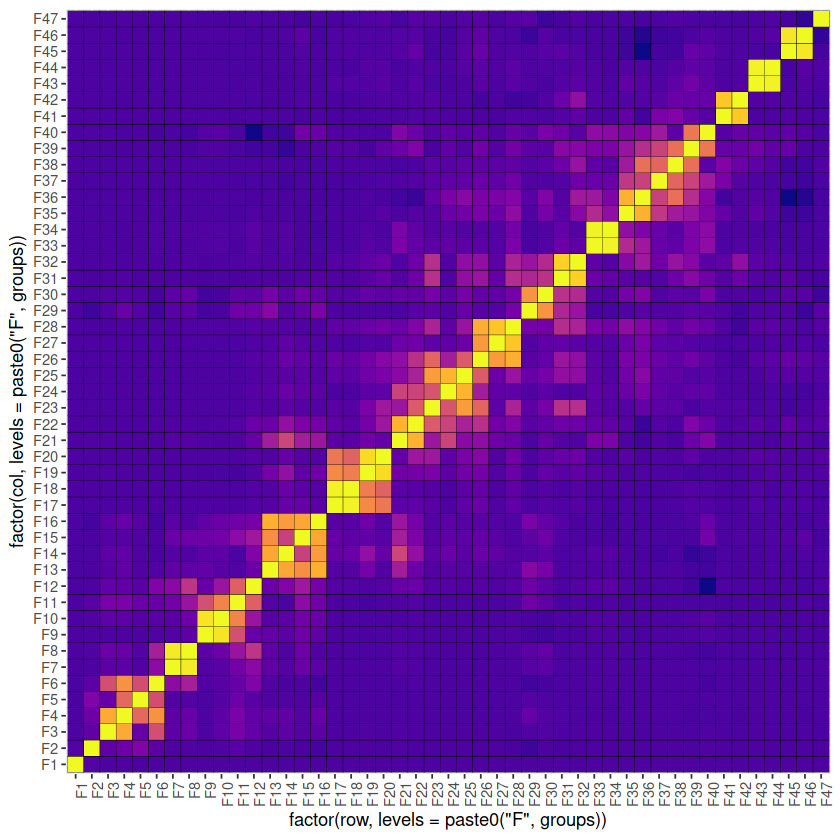

In [29]:
w <- wcor(s, groups = as.list(1:47))
plot.wcor(w, "plasma")

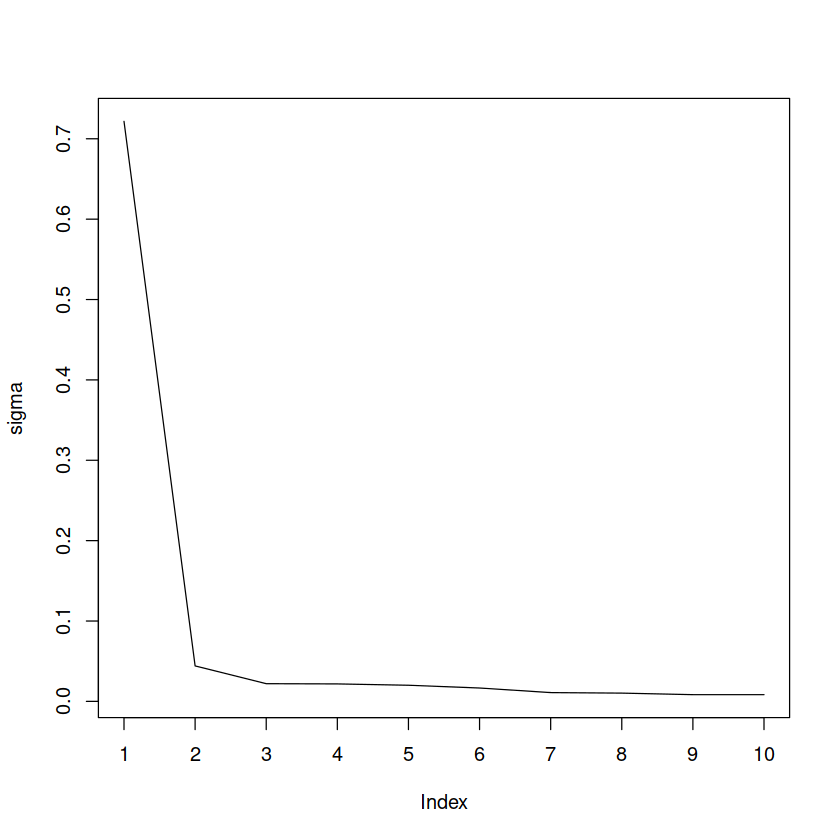

In [30]:
plot.component.norms(s, 10)

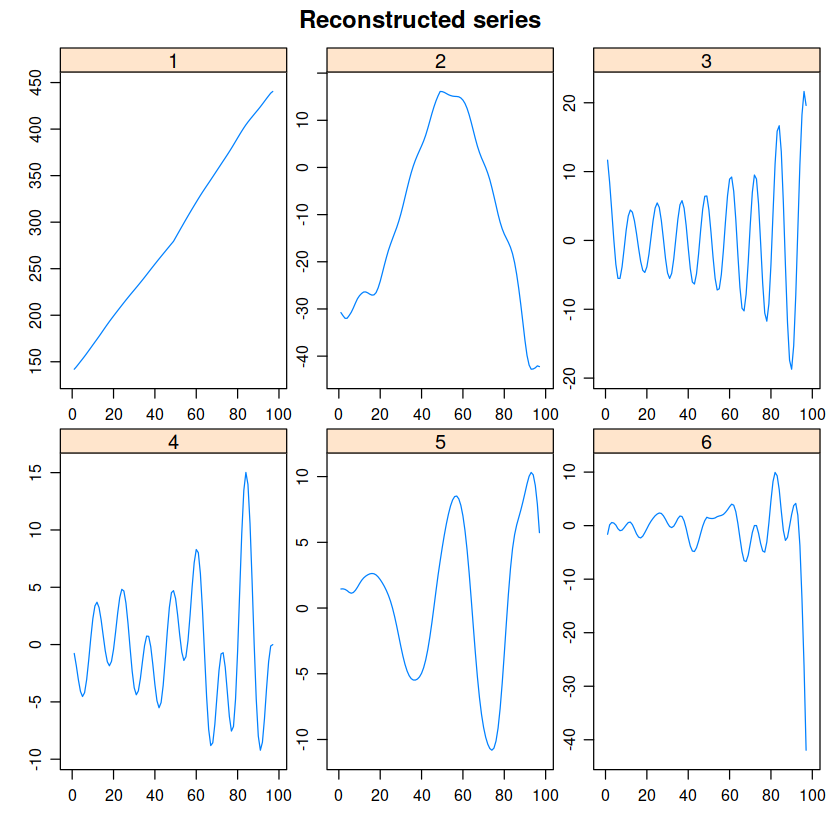

In [31]:
plot(s, type = "series", groups = as.list(1:6))

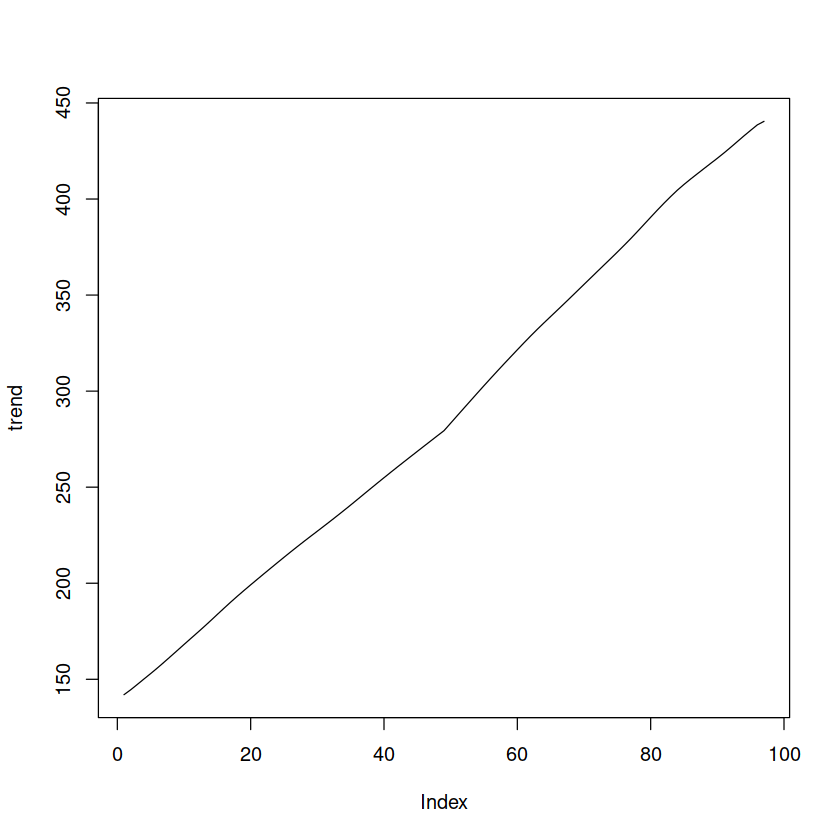

In [32]:
res1 <- reconstruct(s, groups = list(1, 2))
trend <- res1$F1# + res1$F2
plot(trend, type="l")

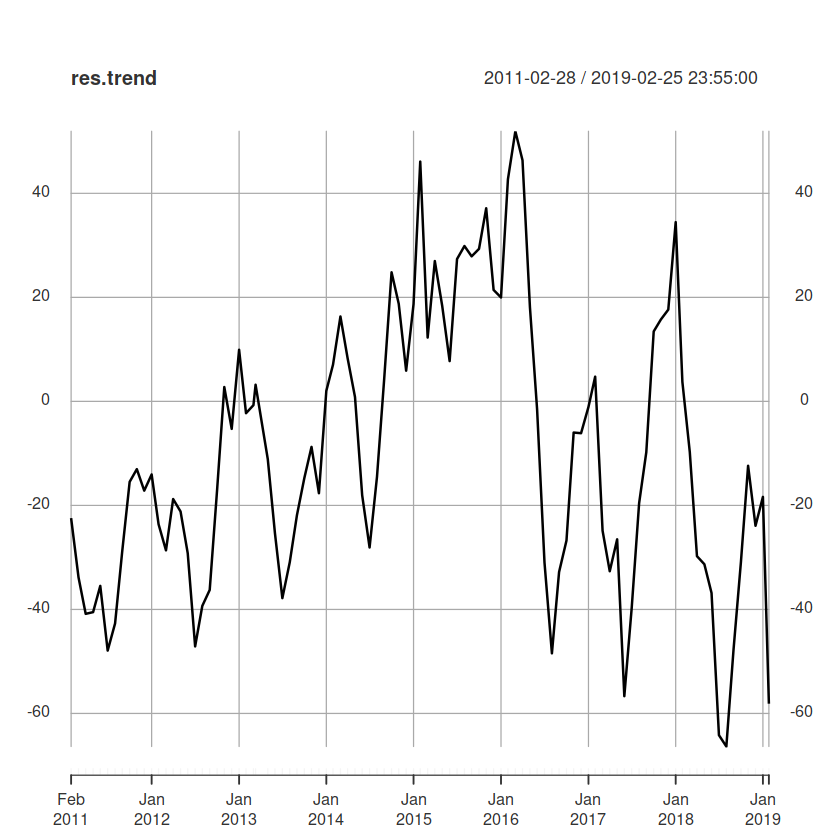

In [33]:
res.trend <- monthly.mean$Bandwidth - trend
plot(res.trend, type="l")

null device 
          1

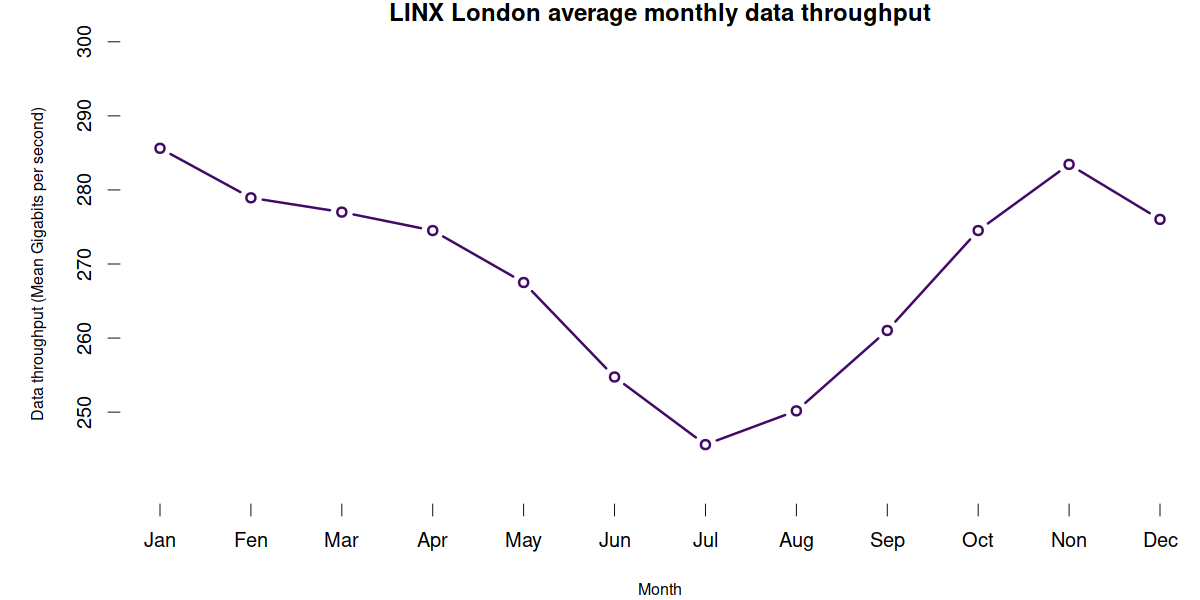

In [295]:
options(repr.plot.width=10, repr.plot.height=5)
# de-trend, get mean months, plot mean bw + mean_month with smooth loess regression
months <- cbind(res.trend, month(index(res.trend)))
mean.months <- tapply(as.vector(months[, 1]), as.vector(months[, 2]), mean)
mean.months <- data.frame(month=1:12, bw=mean.months)
mean.months$smoothed <- predict(loess(bw ~ month, data=mean.months, span=1.25))

#png(filename="img/monthly_mean.png", width = 614, height= 307)
#par(mar=c(2,5,1,0))
par(mar=c(4,5,1,0))
#plot(mean(monthly.mean$Bandwidth)+mean.months$smoothed, type="l", ylim=c(240, 300), xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, col="#420a68", lwd=2)
#lines(mean(monthly.mean$Bandwidth)+mean.months$bw, col="#781c6d", type="b", lty=2)
plot(mean(monthly.mean$Bandwidth)+mean.months$bw, type="b", ylim=c(240, 300), cex.lab=0.8, bty="n", axes=F, lty=1, col="#420a68", lwd=2,
    main="LINX London average monthly data throughput",
    ylab="Data throughput (Mean Gigabits per second)",
    xlab="Month")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=1, at=1:12, labels=c("Jan", "Fen", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Non", "Dec"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=3, at=c(250, 260, 270, 280, 290, 300), labels=c("250", "260", "270", "280", "290", "300"))
dev.off()

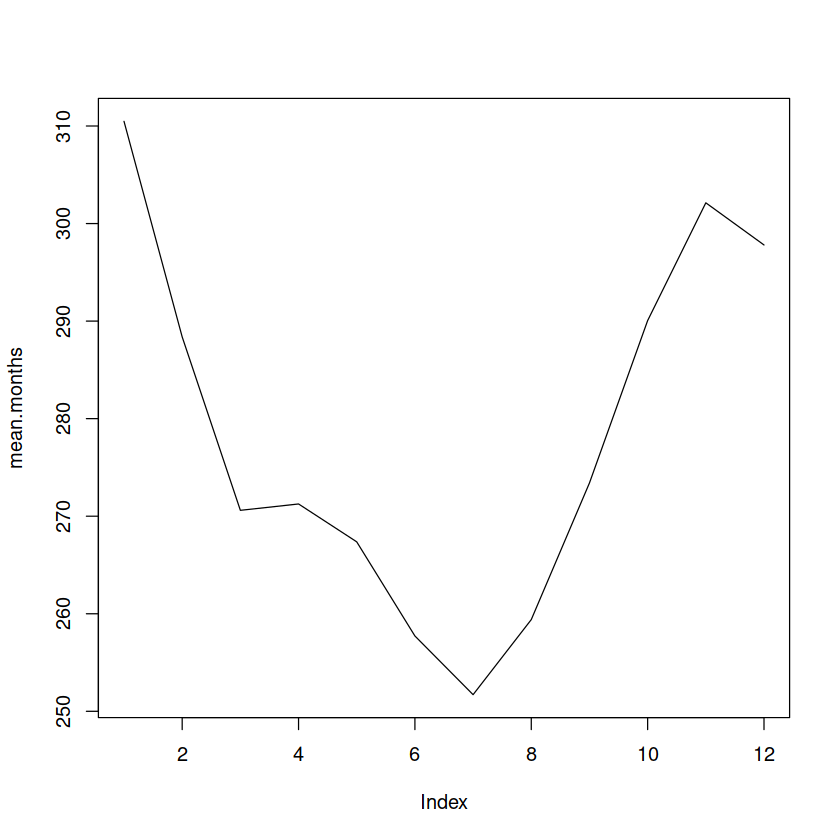

In [35]:
# raw
months <- cbind(monthly.mean$Bandwidth, month(index(monthly.mean$Bandwidth)))
mean.months <- tapply(as.vector(months[, 1]), as.vector(months[, 2]), mean)
plot(mean.months, type="l")

In [36]:
lon2_bw <- lon2["2015-08/2018-10", 1]
summary(lon2_bw)

     Index                          Bandwidth           
 Min.   :2015-08-01 00:00:00.00   Min.   : 33736195312  
 1st Qu.:2016-05-23 22:16:15.00   1st Qu.:241029289928  
 Median :2017-03-16 19:57:30.00   Median :394884988422  
 Mean   :2017-03-16 21:09:27.77   Mean   :361965236546  
 3rd Qu.:2018-01-07 17:48:45.00   3rd Qu.:461738908915  
 Max.   :2018-10-31 23:55:00.00   Max.   :792515600910  


Call:
ssa(x = as.vector(lon2_bw$Bandwidth), L = window)

Series length: 342030,	Window length: 113760,	SVD method: nutrlan
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 46.01 MiB


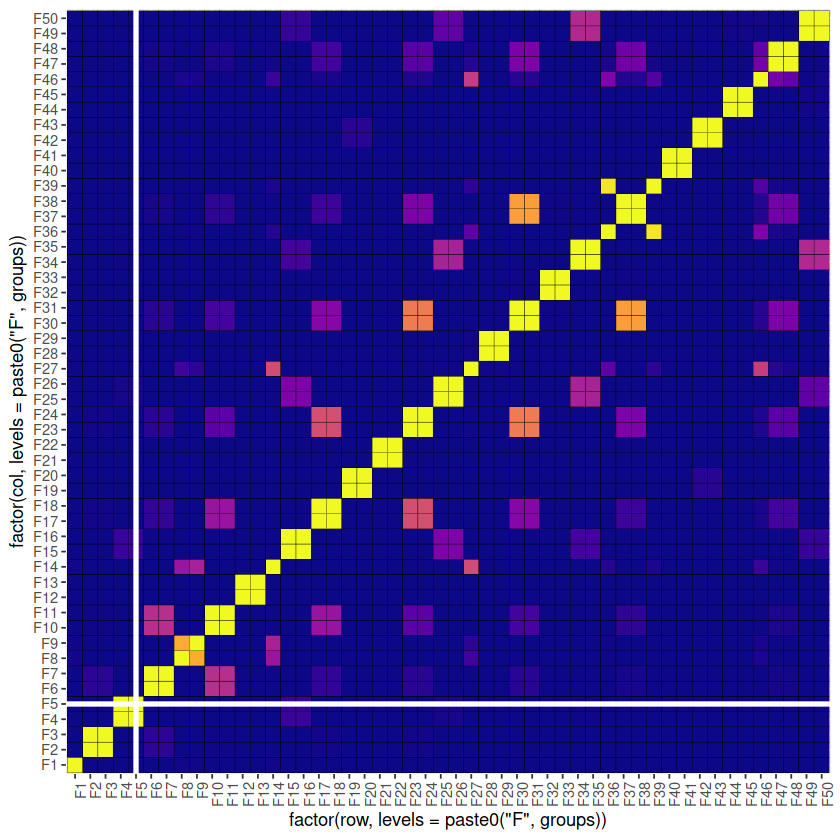

In [37]:
window <- 288*365 + 288*30
s <- ssa(as.vector(lon2_bw$Bandwidth), L=window)
summary(s)
w <- wcor(s, groups = as.list(1:50))
g <- plot.wcor(w, "plasma")
g <- g + geom_vline(xintercept=5, color="#ffffff", size=1.5)
g + geom_hline(yintercept=5, color="#ffffff", size=1.5)

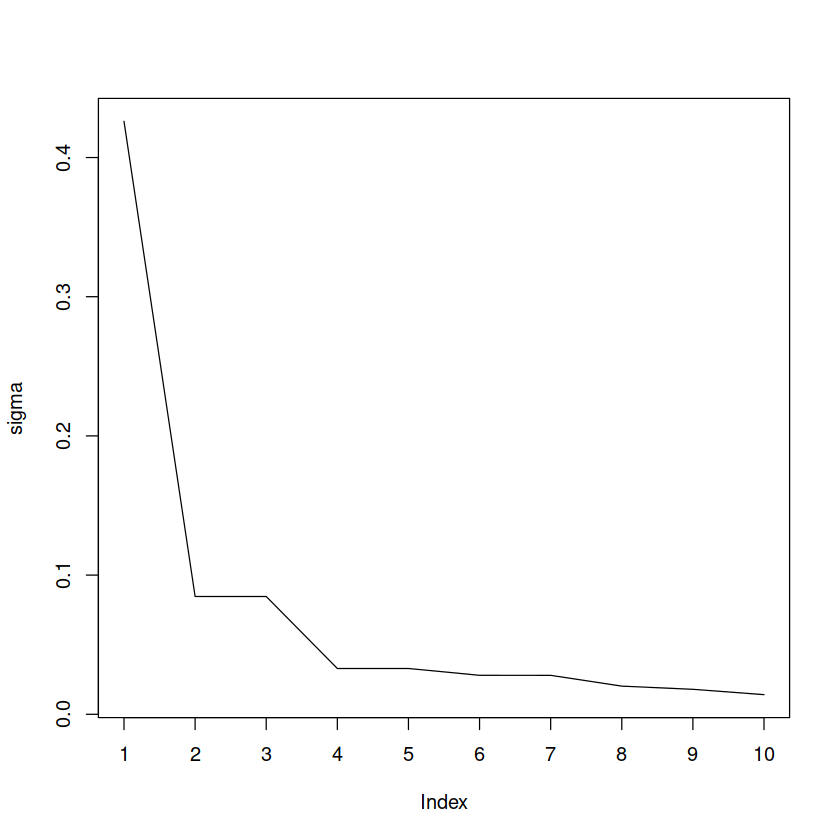

In [38]:
# ^
# trend = F1
# 2 cycles: (F2,F3), (F4,F5)
# rest can not be separated nicely
plot.component.norms(s, 10)

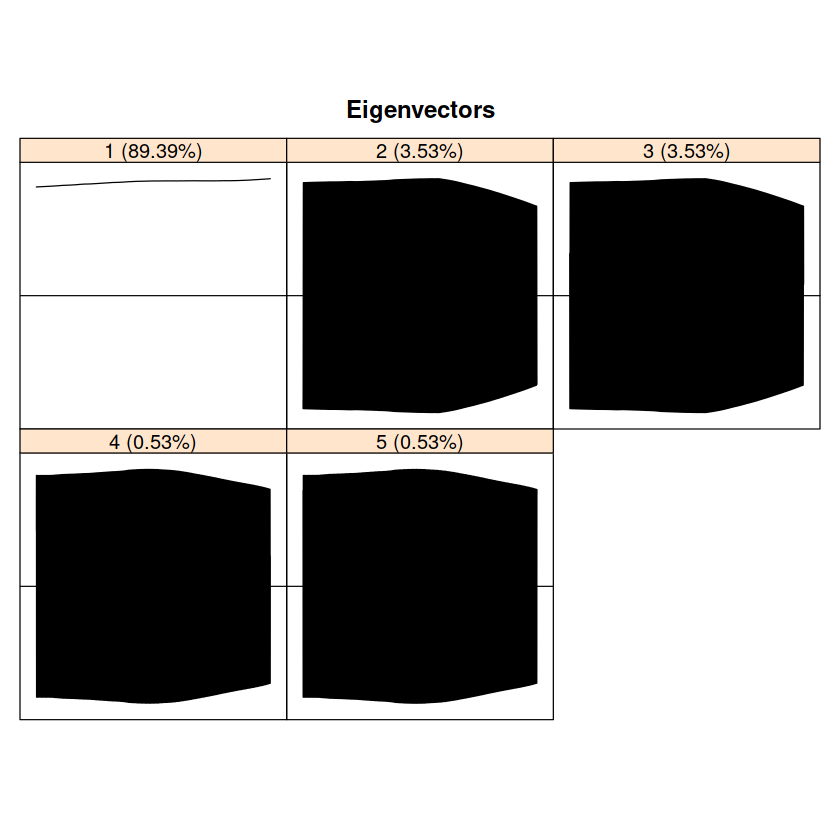

In [39]:
plot(s, type = "vectors", idx=1:5, col="black")

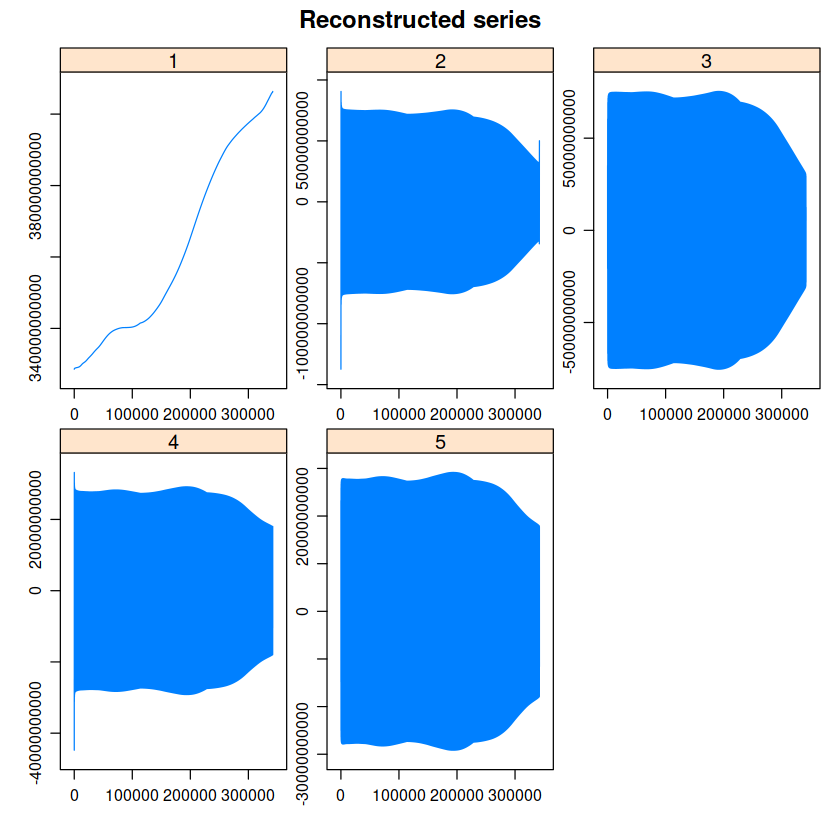

In [40]:
plot(s, type = "series", groups = as.list(1:5))

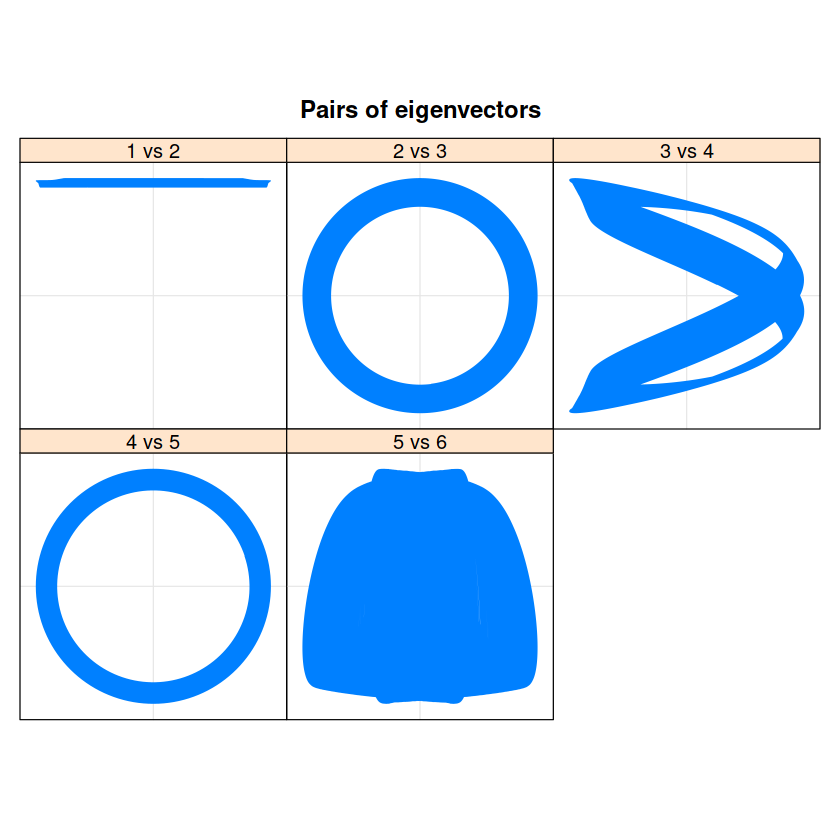

In [41]:
plot(s, type = "paired", idx = 1:5, plot.contrib = FALSE)

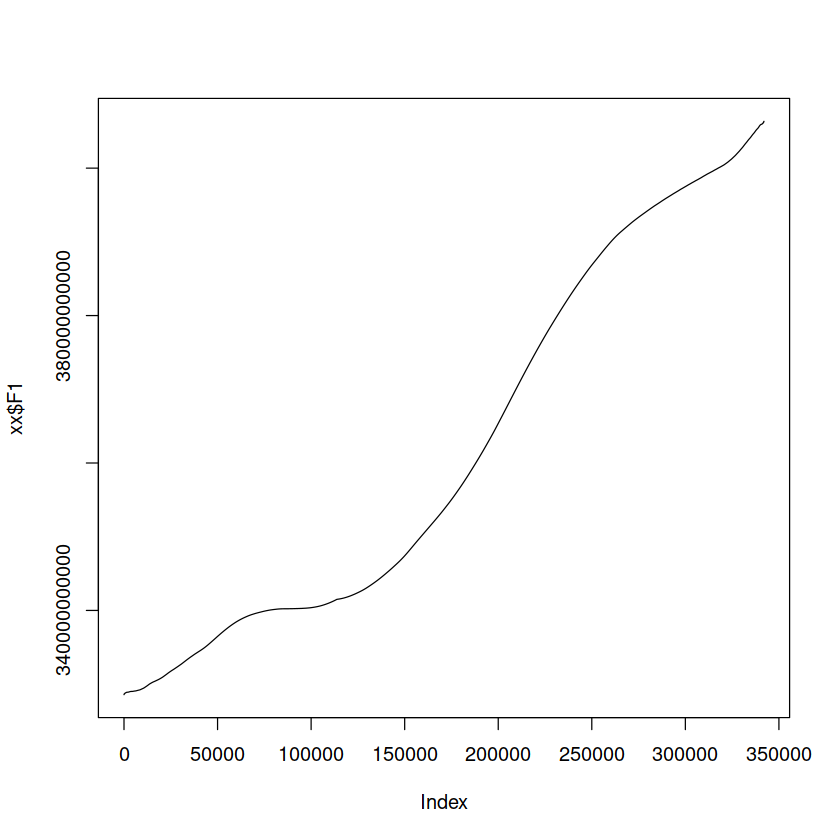

In [42]:
xx <- reconstruct(s, groups = list(1, 2:3, 4:5))
# trend
plot(xx$F1, type="l")

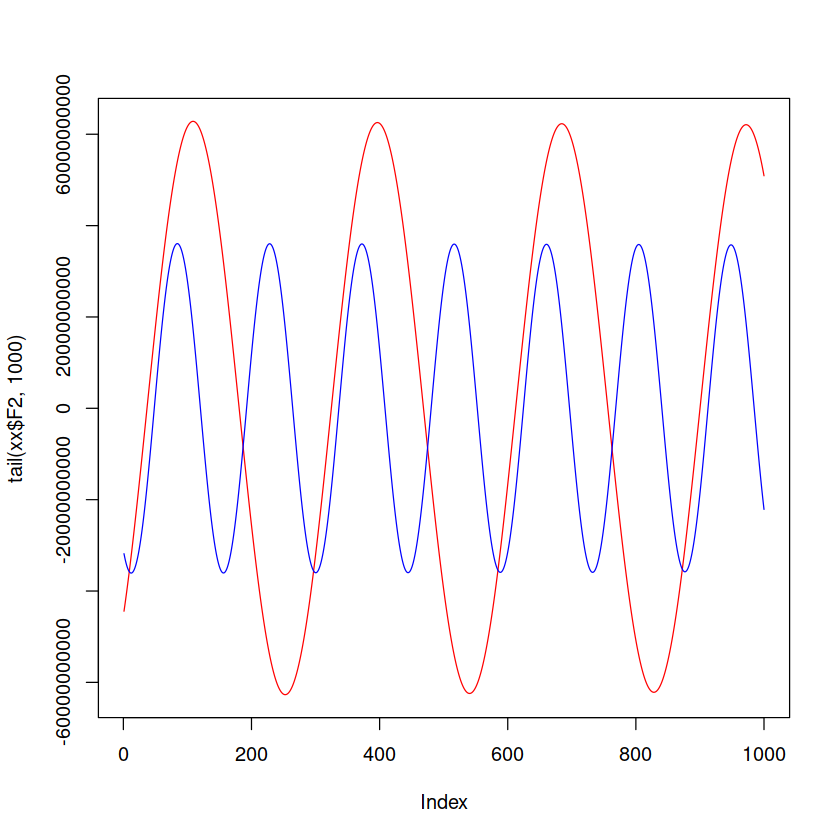

In [43]:
# daily.
plot(tail(xx$F2, 1000), type="l", col="red")
lines(tail(xx$F3, 1000), col="blue")

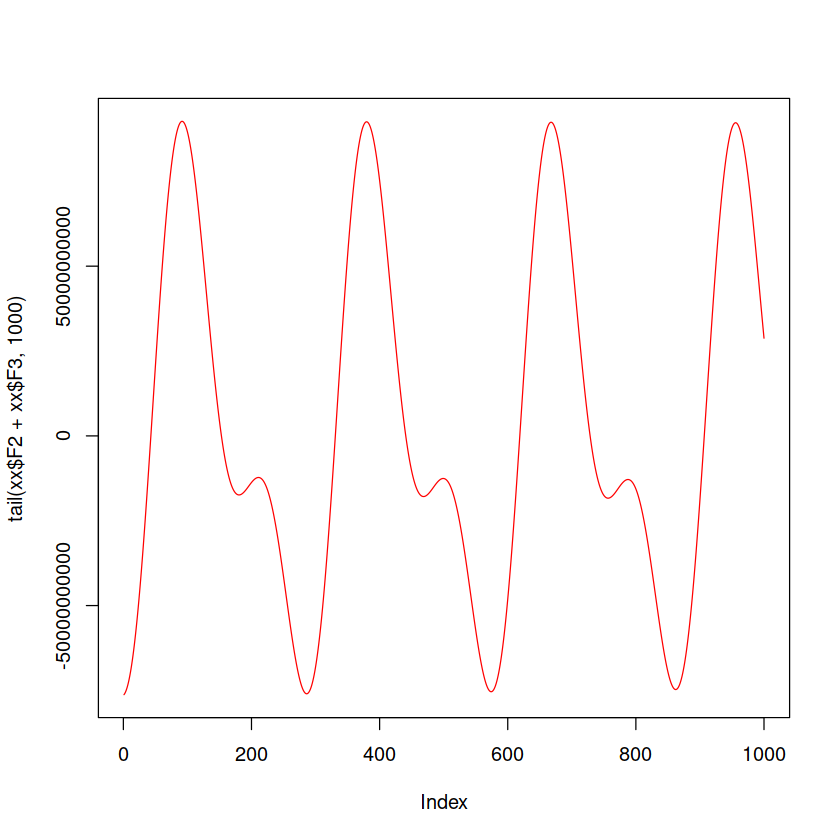

In [44]:
plot(tail(xx$F2+xx$F3, 1000), type="l", col="red")


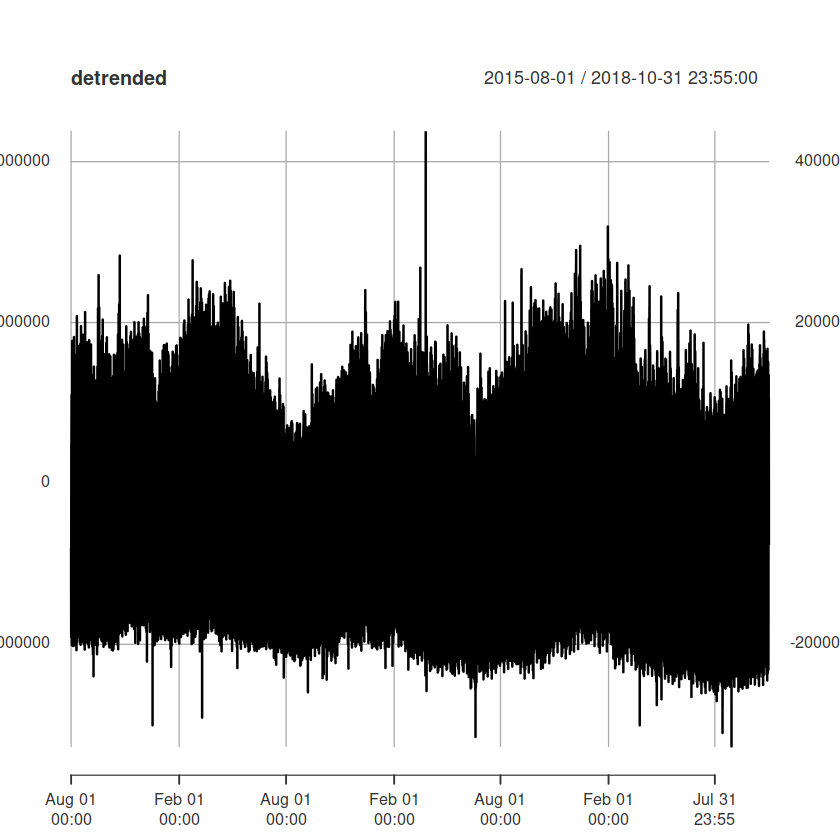

In [45]:
detrended <- lon2_bw - xx$F1
plot(detrended)

In [46]:
head(detrended["T08:00/T08:10"])

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                       Bandwidth
2015-08-01 08:00:00 -26175725765
2015-08-01 08:05:00 -14295533232
2015-08-01 08:10:00 -14151465121
2015-08-02 08:00:00 -60523762675
2015-08-02 08:05:00 -52418284586
2015-08-02 08:10:00 -48990932356

In [47]:
daily.mean <- apply.daily(mean(lon2_bw) + detrended[""], mean)
daily.mean <- apply.daily(mean(lon2_bw) + detrended, mean)
daily.mean$Bandwidth <- daily.mean$Bandwidth * 10^-9
head(daily.mean)

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                    Bandwidth
2015-08-01 23:55:00  344.4542
2015-08-02 23:55:00  351.9738
2015-08-03 23:55:00  375.0263
2015-08-04 23:55:00  359.2663
2015-08-05 23:55:00  366.4882
2015-08-06 23:55:00  373.1291

In [48]:
x <- data.frame(day=weekdays(index(daily.mean)), bw=as.vector(daily.mean$Bandwidth))
x$day <- factor(x$day, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
head(x)

day,bw
Saturday,344.4542
Sunday,351.9738
Monday,375.0263
Tuesday,359.2663
Wednesday,366.4882
Thursday,373.1291


In [49]:
mean.days <- data.frame(day=1:7, tapply(x$bw, x$day, mean))
colnames(mean.days) <- c("day", "bw")
mean.days

,day,bw
Sunday,1,338.5249
Monday,2,364.5872
Tuesday,3,374.3306
Wednesday,4,376.2618
Thursday,5,373.7012
Friday,6,367.9107
Saturday,7,337.7454


null device 
          1

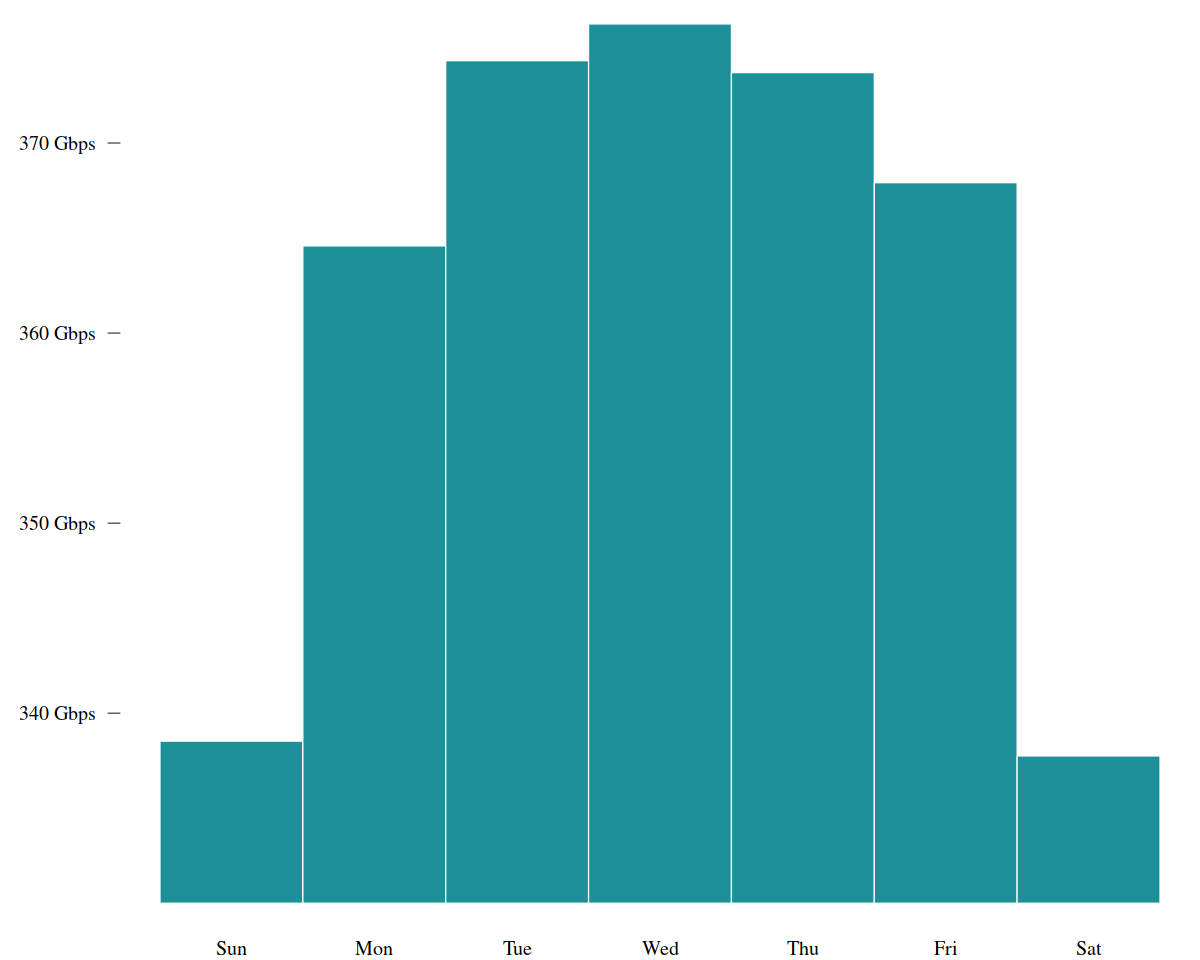

In [298]:
#png(filename="img/daily_mean_bars_3.png", width = 614, height= 307)
#png(filename="/tmp/x.png", width = 307, height= 307)
par(mar=c(2,5,1,0))
fix <- 330 # shift barplot down
barplot(mean.days$bw - fix, axes=F, cex.lab=0.75,family="serif", names.arg=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"), col = "#1c9099", space = 0, border = "#ffffff", col.axis="#000000")
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(340-fix, 350-fix, 360-fix, 370-fix, 380-fix), labels=c("340 Gbps", "350 Gbps", "360 Gbps", "370 Gbps", "380 Gbps"))
dev.off()

In [51]:
x <- lon2["2015-08/2018-04"]
indexTZ(x) <- "Europe/London" # really important!
# add proper day (sun = 1, sat = 7) (using GB timezone.)
x$day <- factor(weekdays(index(x)), levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
head(x["2017-10-27/30", ])

Warning message:
“timezone of object (Europe/London) is different than current timezone ().”

                       Bandwidth Weekday MsM day
2017-10-27 00:00:00 383736979105       5   0   6
2017-10-27 00:05:00 393577456446       5   5   6
2017-10-27 00:10:00 385643459175       5  10   6
2017-10-27 00:15:00 373890513631       5  15   6
2017-10-27 00:20:00 361344106354       5  20   6
2017-10-27 00:25:00 352169900020       5  25   6

In [52]:
window <- nrow(x)/2
s <- ssa(as.vector(x$Bandwidth), L=window)
summary(s)


Call:
ssa(x = as.vector(x$Bandwidth), L = window)

Series length: 289138,	Window length: 144569,	SVD method: nutrlan
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 57.36 MiB


In [53]:
# see ssa analysis for these groupings.
xx <- xts.reconstruct(s, groups = list(t1=c(1, 6, 7, 8), 
                                       c1_a=c(2, 3), c2_b=c(4, 5), c3_d=c(9, 10), c4_a=c(11, 12), c5_a=c(13, 14), 
                                       c6_d=c(15, 16), c7_c=c(17, 18), c8_b=c(19, 20), c9_c=c(21, 22)))

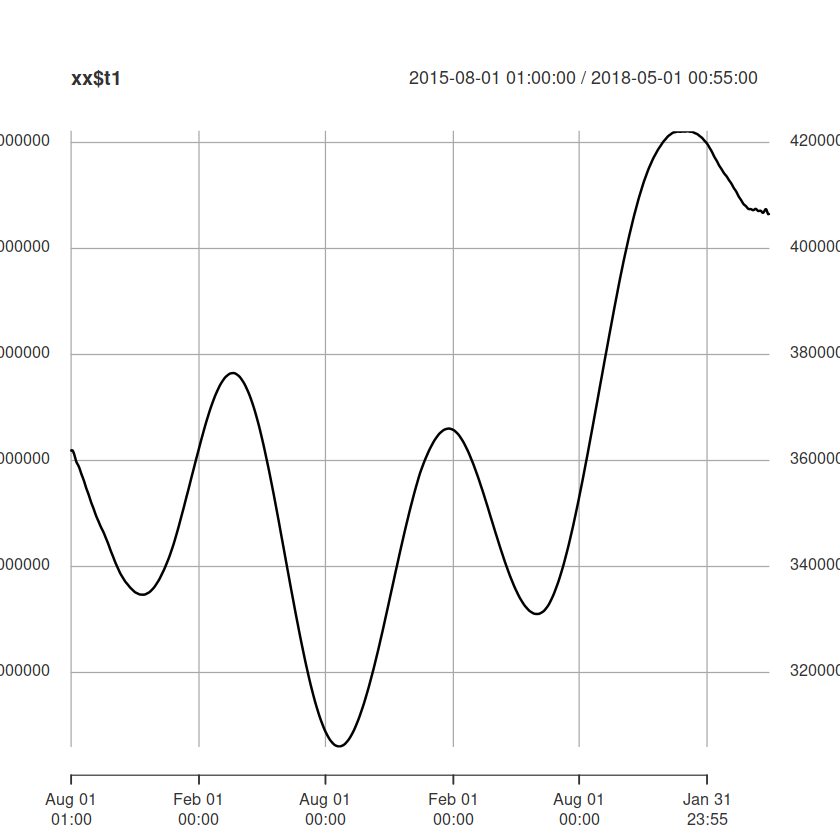

In [54]:
# will remove this from ts.
# (trend + the messy long range inter-seasonal cyclic components)
plot(xx$t1)

In [55]:
head(xx)

Warning message:
“timezone of object (Europe/London) is different than current timezone ().”

                              t1         c1_a         c2_b         c3_d
2015-08-01 01:00:00 361934787626 -77099538883    954754646 -11992571114
2015-08-01 01:05:00 361935162753 -79670723698  -1435925319 -12026608050
2015-08-01 01:10:00 361935393760 -82204095221  -3824067398 -12060583934
2015-08-01 01:15:00 361935614653 -84698400240  -6205077419 -12094448202
2015-08-01 01:20:00 361935839187 -87152420877  -8574392491 -12128199327
2015-08-01 01:25:00 361936023507 -89564998345 -10927512169 -12161855287
                            c4_a       c5_a         c6_d       c7_c        c8_b
2015-08-01 01:00:00 -12927634552 3718421765 -10722804361 5623770632 -6961036932
2015-08-01 01:05:00 -12550137675 3821931857 -10425911098 5852519126 -7096394593
2015-08-01 01:10:00 -12166700243 3923621548 -10049649006 6078380835 -7217315928
2015-08-01 01:15:00 -11777434130 4023469229  -9596825348 6301238182 -7323564968
2015-08-01 01:20:00 -11382527376 4121414282  -9070847013 6520924332 -7414980830
2015-08-01 01:25

In [56]:
# de-trended daily means
daily.means <- round(as.vector(tapply(x$Bandwidth - xx$t1, x$day, mean)))
daily.means <- mean(xx$t1) + daily.means # just to shift up
daily.means <- daily.means * 10^-9 # Gbps
daily.means

[1] 338.6827 361.6627 370.9534 372.7728 369.6991 364.9200 336.7815

In [57]:
# de-trended weekly means
week.profile <- tapply(x$Bandwidth - xx$t1, list(x$day, x$MsM), mean)
week.profile <- mean(xx$t1) + week.profile
week.profile <- week.profile * 10^-9 # Gbps
week.profile
ncol(week.profile)

,0,5,10,15,20,25,30,35,40,45,⋯,1390,1395,1400,1405,1410,1415,1420,1425,1430,1435
1,336.3831,342.3373,334.3022,325.4691,318.7404,311.7473,304.6642,300.3009,292.5813,286.3760,⋯,385.1216,377.3898,370.2952,361.8263,354.3316,348.0674,339.9681,331.7991,325.1750,317.2909
2,310.3876,315.2352,306.0879,297.3987,290.4954,282.4427,274.9324,269.8255,262.2275,255.2595,⋯,399.4666,390.8004,382.8506,373.7589,365.3464,358.0480,349.8129,341.6013,334.2631,325.4293
3,317.2009,322.7572,313.0607,303.2738,296.8596,289.6699,281.9874,276.7707,268.5284,261.2371,⋯,412.4546,404.7070,396.9836,387.8457,378.6416,371.7920,362.5023,353.4304,345.7776,336.7492
4,328.9459,334.1064,323.9447,313.6508,306.8943,298.5495,291.1109,285.7521,277.2465,269.1638,⋯,407.0244,398.6609,390.7933,381.4065,372.9546,366.6366,357.4869,348.8453,341.5184,333.0551
5,325.5217,330.8501,321.2617,311.9909,304.1517,295.4900,287.1590,281.8850,273.2675,266.3086,⋯,410.8178,402.8460,395.4739,386.4559,377.9784,372.3401,364.2832,355.7720,348.2567,339.3510
6,332.4726,338.3923,328.8157,318.5636,310.9122,302.3853,294.4661,289.7034,281.8056,274.4253,⋯,408.3086,402.5566,396.6028,389.4360,382.8952,378.0692,370.9190,363.9945,358.2036,350.7989
7,344.6188,350.0152,341.4996,331.8511,324.4256,317.9080,310.4806,305.3939,297.7702,290.7980,⋯,395.3444,390.0295,385.1191,378.4152,372.5502,367.6251,361.2541,354.9995,349.0508,342.1368


[1] 288

In [339]:
# time use survey reported work (7 day period)
work <- read.csv("../../time_use/data/tab/uktus15_wksched.tab.xz", sep = "\t")
worked <- apply(work[, 14:(ncol(work) - 1)], 2, function(x) sum(x == 2))
worked <- c(tail(worked, 16), head(worked, -16))
worked <- data.frame(day=rep(1:7, each=96), ppl=worked)
worked[90:100, ]
nrow(worked) # 24*4*7 = 672

,day,ppl
t2215_2230_d1,1,148
t2230_2245_d1,1,140
t2245_2300_d1,1,137
t2300_2315_d1,1,118
t2315_2330_d1,1,111
t2330_2345_d1,1,105
t2345_2400_d1,1,101
t0000_0015_d1,2,87
t0015_0030_d1,2,85
t0030_0045_d1,2,84


[1] 672

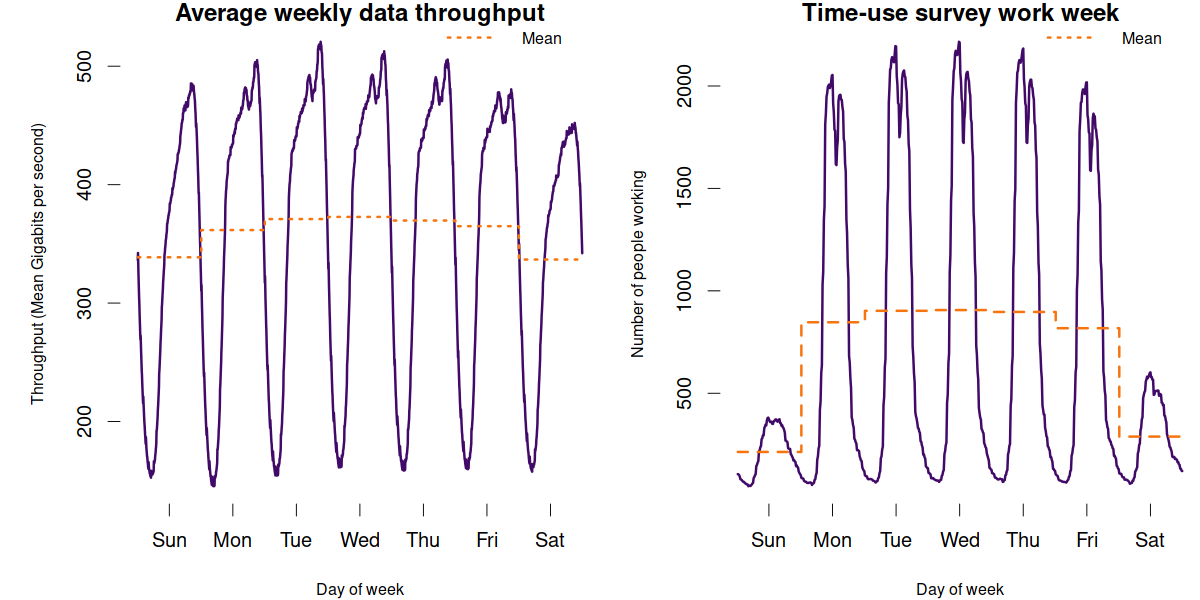

In [361]:
options(repr.plot.width=10, repr.plot.height=5)
# transpose, then take column order to get 1d vector.
week.profile.flat <- as.vector(t(week.profile))
stag <- seq(from=144, to=288*7 - 144, by=288) # each day has 288 points, place tick at midday for each day.

par(mar=c(4,5,1,0), mfrow=c(1,2))

plot(week.profile.flat, type="l", cex.lab=0.8, bty="n", axes=F, lty=1, col="#420a68", lwd=2,
     main="Average weekly data throughput",
     ylab="Throughput (Mean Gigabits per second)",
     xlab="Day of week")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=1, at=stag, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=3, at=c(200, 300, 400, 500), labels=c("200", "300", "400", "500"))
# hacky way to overlay means...
lines(unlist(lapply(daily.means, function(x) rep(x, 288))), col="#f7750f", cex=0.25, type="s", lty=3, lwd=2)
legend("topright", "Mean", lty=3, lwd=2, cex=0.8, col="#f7750f", bty="n")                      

stag <- seq(from=48, to=96*7 - 48, by=96)
plot(worked$ppl, type="l", cex.lab=0.8, bty="n", axes=F, lty=1, col="#420a68", lwd=2,
     main="Time-use survey work week",
     ylab="Number of people working",
     xlab="Day of week")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=1, at=stag, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=3, at=c(500, 1000, 1500, 2000), labels=c("500", "1000", "1500", "2000"))
# hacky way to overlay means...
worked.means <- tapply(worked$ppl, worked$day, mean)
lines(unlist(lapply(worked.means, function(x) rep(x, 96))), col="#f7750f", cex=0.25, type="s", lty=2, lwd=2)
                    legend("topright", "Mean", lty=3, lwd=2, cex=0.8, col="#f7750f", bty="n")     

In [301]:
head(time.use)

ts,in.bed,working,commute,reported.enjoyment,where.home,where.working,where.commute,what.device,tv,internet,eat,games
00:05,3147,189,21,6.137102,3602,182,66,222,35,42,61,21
00:10,3147,189,21,6.137102,3602,182,66,222,35,42,61,21
00:15,3241,184,21,6.146808,3610,178,64,208,31,35,51,16
00:20,3241,184,21,6.146808,3610,178,64,208,31,35,51,16
00:25,3311,185,20,6.156909,3622,175,56,177,29,30,39,15
00:30,3311,185,20,6.156909,3622,175,56,177,29,30,39,15


null device 
          1

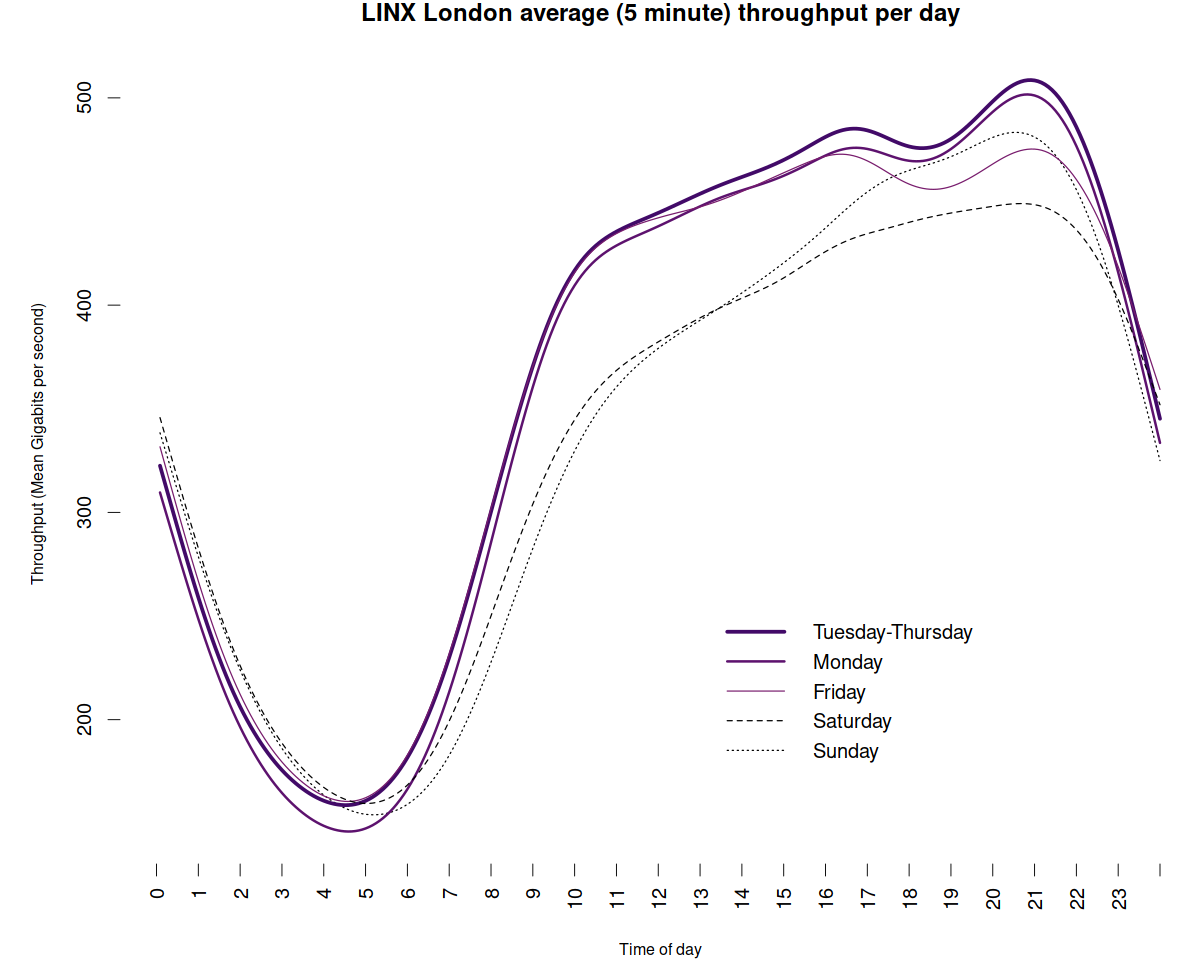

In [312]:
options(repr.plot.width=10, repr.plot.height=8)
mid.week <- colMeans(week.profile[3:5, ])
                                                                    
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
#hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")
hour <- c(0:23, NA)

#png(filename="img/average_day.png", width = 614, height= 614)
#par(mar=c(4,5,1,0))
par(mar=c(4,5,1,0))
plot(smooth.spline(week.profile[1, ], df=df), ylim=range(week.profile), type="l", cex.lab=0.8, ,bty="n", axes=F, lty=3,
    main="LINX London average (5 minute) throughput per day",
    ylab="Throughput (Mean Gigabits per second)",
    xlab="Time of day")
lines(col="#5d126e", smooth.spline(week.profile[2, ], df=df), lwd=2) # monday
lines(col="#420a68", smooth.spline(mid.week, df=df), lwd=3)   # tue-thu
lines(col="#781c6d", smooth.spline(week.profile[6, ], df=df)) # friday
lines(smooth.spline(week.profile[7, ], df=df), lty=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=2, at=stag, labels=hour)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, las=3, at=c(200, 300, 400, 500), labels=c("200", "300", "400", "500"))
legend("bottomright",
  legend = c("Tuesday-Thursday", "Monday", "Friday", "Saturday", "Sunday"), 
  col = c("#420a68", "#5d126e", "#781c6d", "#000000", "#000000"), 
  lty=c("solid", "solid", "solid", "dashed", "dotted"),
  lwd=c(3,2,1,1,1),
  bty = "n", 
  pt.cex = 1, 
  cex = 1, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))
dev.off()

In [60]:
times <- format.Date(seq.POSIXt(from=as.POSIXct("2018-11-04 00:00:00"), to=as.POSIXct("2018-11-04 23:55:00"), by="5 min"), "%H:%M")
mor.min <- data.frame(min=apply(week.profile, 1, min), t=apply(week.profile, 1, function(x) which.min(x)))
mor.min$ts <- times[mor.min$t]
# <= 7pm
day.max <- data.frame(max=apply(week.profile[, 1:229], 1, max), t=apply(week.profile[, 1:229], 1, function(x) which.max(x)))
day.max$ts <- times[day.max$t]
# > 7pm
eve.max <- data.frame(max=apply(week.profile[, 230:ncol(week.profile)], 1, max), t=apply(week.profile[, 230:ncol(week.profile)], 1, function(x) 229+which.max(x)))                                                                
eve.max$ts <- times[eve.max$t]
cbind(mor.min, day.max, eve.max)

min,t,ts,max,t,ts,max,t,ts
152.5884,61,05:00,469.6495,220,18:15,485.4608,242,20:05
145.3791,58,04:45,482.1163,200,16:35,505.1118,254,21:05
154.3592,55,04:30,492.6041,203,16:50,520.6330,254,21:05
161.1973,49,04:00,492.9208,200,16:35,512.6374,254,21:05
158.5866,55,04:30,490.7238,200,16:35,505.6510,254,21:05
159.8233,58,04:45,478.0711,198,16:25,480.4814,254,21:05
157.6653,61,05:00,445.3382,218,18:05,452.1505,254,21:05


null device 
          1

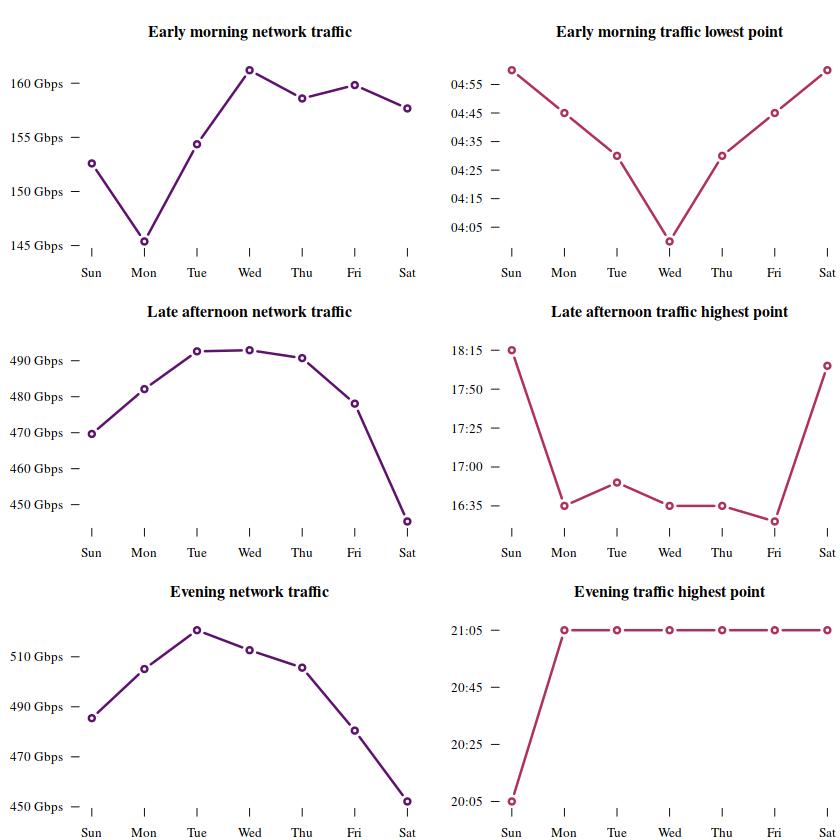

In [61]:
#png(filename="img/peak_times.png", width = 614, height = 614)
par(mfrow=c(3,2), mar=c(2,5,4,0), family = "serif")

plot(col="#5d126e", lwd=2, mor.min$min, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(145, 150, 155, 160), labels=c("145 Gbps", "150 Gbps", "155 Gbps", "160 Gbps"))
title("Early morning network traffic")

plot(col="#ae305c", lwd=2, mor.min$t, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(50, 52, 54, 56, 58, 60), labels=times[c(50, 52, 54, 56, 58, 60)])
title("Early morning traffic lowest point")

plot(col="#5d126e", lwd=2, day.max$max, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(450, 460, 470, 480, 490), labels=c("450 Gbps", "460 Gbps", "470 Gbps", "480 Gbps", "490 Gbps"))
title("Late afternoon network traffic")

plot(col="#ae305c",lwd=2, day.max$t, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(200, 205, 210, 215, 220), labels=times[c(200, 205, 210, 215, 220)])
title("Late afternoon traffic highest point")

plot(col="#5d126e", lwd=2, eve.max$max, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(450, 470, 490, 510), labels=c("450 Gbps", "470 Gbps", "490 Gbps", "510 Gbps"))
title("Evening network traffic")

plot(col="#ae305c",lwd=2, eve.max$t, type="b", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif")
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=1:7, labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=1, at=c(242, 246, 250, 254), labels=times[c(242, 246, 250, 254)])
title("Evening traffic highest point")
dev.off()

## time use survey

In [62]:
time.use <- read.csv("time_use.csv")
head(time.use)
summary(time.use)

ts,in.bed,working,commute,reported.enjoyment,where.home,where.working,where.commute,what.device,tv,internet,eat,games
00:05,3147,189,21,6.137102,3602,182,66,222,35,42,61,21
00:10,3147,189,21,6.137102,3602,182,66,222,35,42,61,21
00:15,3241,184,21,6.146808,3610,178,64,208,31,35,51,16
00:20,3241,184,21,6.146808,3610,178,64,208,31,35,51,16
00:25,3311,185,20,6.156909,3622,175,56,177,29,30,39,15
00:30,3311,185,20,6.156909,3622,175,56,177,29,30,39,15


       ts          in.bed          working          commute     
 00:00  :  1   Min.   :  33.0   Min.   : 111.0   Min.   :  3.0  
 00:05  :  1   1st Qu.:  99.0   1st Qu.: 210.0   1st Qu.: 27.0  
 00:10  :  1   Median : 303.5   Median : 524.5   Median : 63.5  
 00:15  :  1   Mean   :1320.2   Mean   :1123.2   Mean   :129.0  
 00:20  :  1   3rd Qu.:3018.0   3rd Qu.:2291.0   3rd Qu.:177.5  
 00:25  :  1   Max.   :3860.0   Max.   :2886.0   Max.   :580.0  
 (Other):282                                                    
 reported.enjoyment   where.home     where.working    where.commute  
 Min.   :4.841      Min.   : 714.0   Min.   : 116.0   Min.   : 23.0  
 1st Qu.:4.968      1st Qu.: 920.8   1st Qu.: 197.8   1st Qu.:100.5  
 Median :5.478      Median :2598.5   Median : 495.5   Median :346.0  
 Mean   :5.497      Mean   :2310.3   Mean   :1069.8   Mean   :358.5  
 3rd Qu.:6.056      3rd Qu.:3557.5   3rd Qu.:2296.5   3rd Qu.:530.5  
 Max.   :6.219      Max.   :3749.0   Max.   :2657.0   Max.  

In [63]:
work.week <- colMeans(week.profile[2:6, ])

null device 
          1

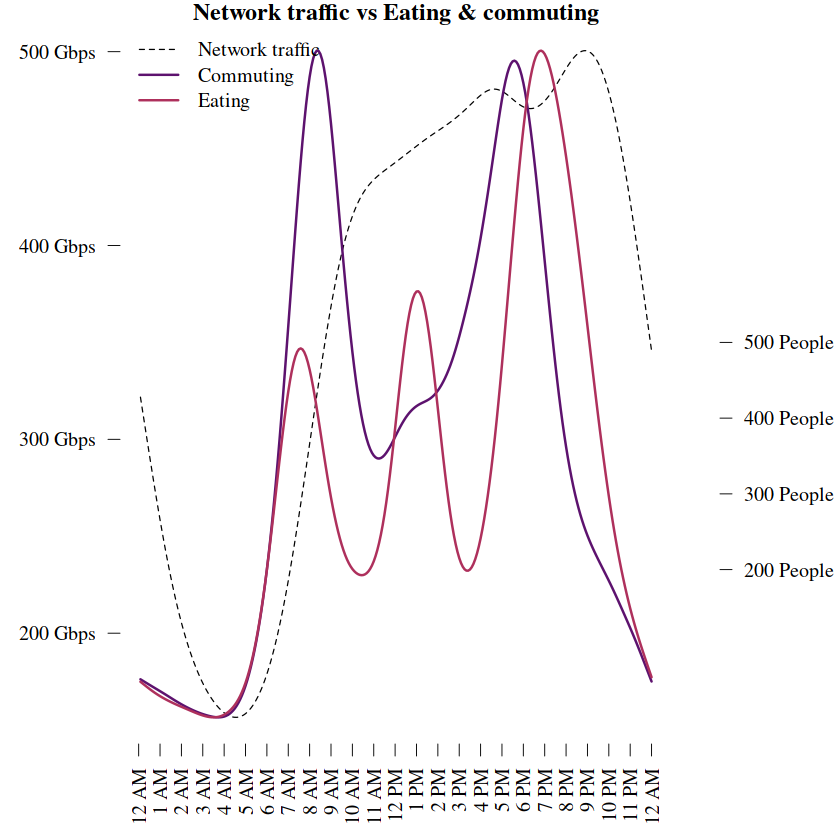

In [64]:
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")

#png(filename="img/traffic_vs_commuting.png", width = 614, height= 307)
par(mar=c(4,5,1,7), family = "serif")
plot(smooth.spline(work.week, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=2, lwd=1)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 Gbps", "300 Gbps", "400 Gbps", "500 Gbps"))
par(new=T)
plot(col="#5d126e", smooth.spline(time.use$where.commute, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=stag, labels=hour)
par(new=T)
plot(col="#ae305c", smooth.spline(time.use$eat, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(2, side=4, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 People", "300 People", "400 People", "500 People"))
legend("topleft",
  legend = c("Network traffic", "Commuting", "Eating"),
  col = c("#000000", "#5d126e", "#ae305c"), 
  lty=c("dashed", "solid", "solid"),
  lwd=c(1,2,2),
  bty = "n", 
  pt.cex = 1, 
  cex = 1, 
  text.col = "black", 
  horiz = F , 
  inset = c(0, 0))
title("Network traffic vs Eating & commuting")
dev.off()

null device 
          1

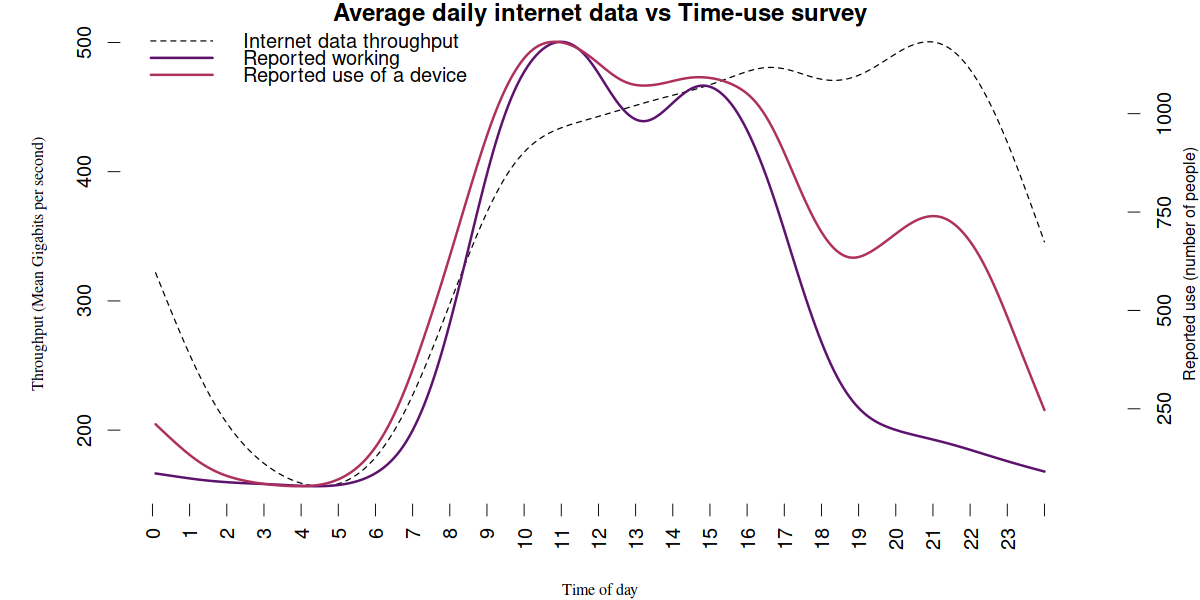

In [395]:
options(repr.plot.width=10, repr.plot.height=5)
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
#hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")
hour <- c(0:23, NA)

#png(filename="img/traffic_vs_working.png", width = 614, height= 307)
par(mar=c(4,5,1,5))
plot(smooth.spline(work.week, df=df), type="l", cex.lab=0.8, bty="n", axes=F, family="serif", lty=2, lwd=1,
     xlab="Time of day", ylab="Throughput (Mean Gigabits per second)")
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1,las=3, at=c(200, 300, 400, 500), labels=c("200", "300", "400", "500"))
par(new=T)
plot(col="#5d126e", smooth.spline(time.use$working, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1,  las=2, at=stag, labels=hour)
par(new=T)
plot(col="#ae305c", smooth.spline(time.use$what.device, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(2,  side=4, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1,  las=3, at=c(250, 500, 750, 1000), labels=c("250", "500", "750", "1000"))
mtext("Reported use (number of people)", side=4, line=4, cex = 0.8)
legend("topleft",
  legend = c("Internet data throughput", "Reported working", "Reported use of a device"),
  col = c("#000000", "#5d126e", "#ae305c"), 
  lty=c("dashed", "solid", "solid"),
  lwd=c(1,2,2),
  bty = "n", 
  pt.cex = 1, 
  cex = 1, 
  text.col = "black", 
  horiz = F , 
  inset = c(0, 0))
title("Average daily internet data vs Time-use survey")
dev.off()

null device 
          1

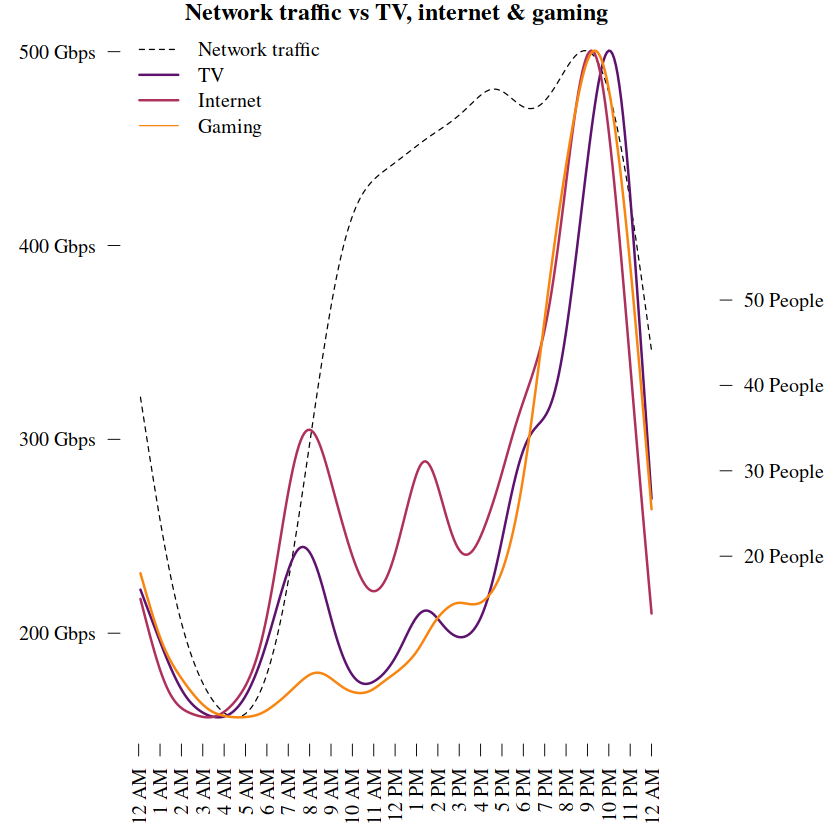

In [66]:
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")

#png(filename="img/traffic_vs_tv.png", width = 614, height= 307)
par(mar=c(4,5,1,7), family = "serif")
plot(smooth.spline(work.week, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=2, lwd=1)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 Gbps", "300 Gbps", "400 Gbps", "500 Gbps"))
par(new=T)
plot(col="#5d126e", smooth.spline(time.use$tv, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=stag, labels=hour)
par(new=T)
plot(col="#ae305c", smooth.spline(time.use$internet, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
par(new=T)
plot(col="#f8850f", smooth.spline(time.use$games, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(2, side=4, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(20, 30, 40, 50), labels=c("20 People", "30 People", "40 People", "50 People"))
legend("topleft",
  legend = c("Network traffic", "TV", "Internet", "Gaming"),
  col = c("#000000", "#5d126e", "#ae305c", "#f8850f"), 
  lty=c("dashed", "solid", "solid", "solid"),
  lwd=c(1,2,2),
  bty = "n", 
  pt.cex = 1, 
  cex = 1, 
  text.col = "black", 
  horiz = F , 
  inset = c(0, 0))
title("Network traffic vs TV, internet & gaming")
dev.off()

In [67]:
ssa <- read.csv("../../SSA/inter_day.csv")
head(ssa)

X,t1,t1.1,t1.2
2017-04-19 00:00:00,288943625842,353484475788,283393615972
2017-04-19 00:05:00,283671705045,350979879912,278084437247
2017-04-19 00:10:00,278424946127,348468347588,272803049469
2017-04-19 00:15:00,273209381871,345954609598,267555501969
2017-04-19 00:20:00,268031037105,343443404690,262347834880
2017-04-19 00:25:00,262895919088,340939470586,257186069514


null device 
          1

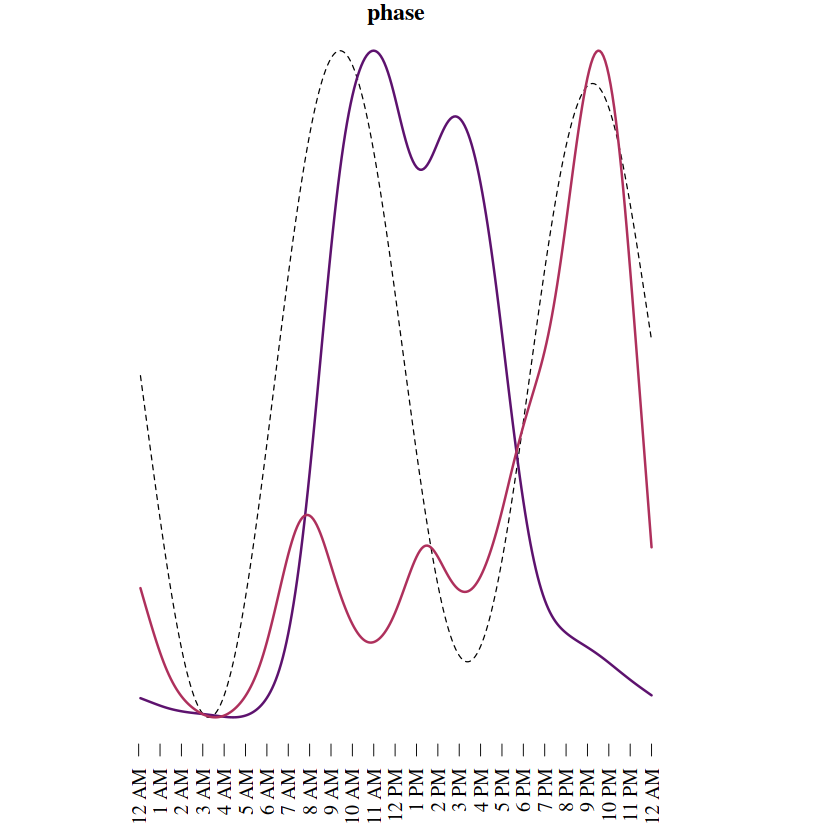

In [68]:
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")

#png(filename="img/traffic_vs_tv.png", width = 614, height= 307)
par(mar=c(4,5,1,7), family = "serif")
plot(smooth.spline(ssa[, 3], df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=2, lwd=1)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 Gbps", "300 Gbps", "400 Gbps", "500 Gbps"))
par(new=T)
plot(col="#5d126e", smooth.spline(time.use$working, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=stag, labels=hour)
par(new=T)
plot(col="#ae305c", smooth.spline(time.use$tv+time.use$games + time.use$internet, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)

title("phase")
dev.off()

# DfT report

In [69]:
road.traffic.2015 <- read.csv("../../data/DfT/2015.csv")
road.traffic.2016 <- read.csv("../../data/DfT/2016.csv")
road.traffic.2017 <- read.csv("../../data/DfT/2017.csv")
road.traffic <- 1/3 * (road.traffic.2015[, 2:8] + road.traffic.2016[, 2:8] + road.traffic.2017[, 2:8])
road.traffic <- cbind(time=road.traffic.2017$Time, road.traffic)
road.traffic

time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
00:00-01:00,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
01:00-02:00,10.16667,11.066667,11.53333,12.03333,13.23333,16.40000,16.76667
02:00-03:00,8.60000,9.966667,10.20000,10.66667,11.46667,12.73333,11.50000
03:00-04:00,10.96667,11.733333,11.86667,12.30000,12.86667,12.43333,10.06667
04:00-05:00,21.40000,19.466667,19.33333,19.66667,19.63333,14.96667,10.60000
05:00-06:00,54.30000,48.566667,47.53333,47.23333,44.86667,24.76667,15.36667
06:00-07:00,120.63333,118.066667,115.96667,114.30000,104.80000,42.30000,25.06667
07:00-08:00,182.13333,186.900000,185.66667,182.93333,169.10000,66.30000,38.06667
08:00-09:00,181.26667,187.400000,186.76667,184.86667,171.23333,97.63333,56.13333
09:00-10:00,149.83333,153.233333,153.76667,152.86667,146.13333,128.90000,92.43333


In [70]:
orig.order <- format.POSIXct(seq(as.POSIXct("2018-11-05 01:00:00", tz="UTC"), as.POSIXct("2018-11-06 00:00:00", tz="UTC"), by="1 hour"), "%H:%M") 
orig.order

[1] "01:00" "02:00" "03:00" "04:00" "05:00" "06:00" "07:00" "08:00" "09:00"
[10] "10:00" "11:00" "12:00" "13:00" "14:00" "15:00" "16:00" "17:00" "18:00"
[19] "19:00" "20:00" "21:00" "22:00" "23:00" "00:00"

In [71]:
road.traffic$time <- orig.order
head(road.traffic)

time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
01:00,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
02:00,10.16667,11.066667,11.53333,12.03333,13.23333,16.40000,16.76667
03:00,8.60000,9.966667,10.20000,10.66667,11.46667,12.73333,11.50000
04:00,10.96667,11.733333,11.86667,12.30000,12.86667,12.43333,10.06667
05:00,21.40000,19.466667,19.33333,19.66667,19.63333,14.96667,10.60000
06:00,54.30000,48.566667,47.53333,47.23333,44.86667,24.76667,15.36667


In [72]:
# interpolate missing 5 minute time points / expand from 1 hour to 5 minute intervals.
xx <- data.frame(time=format.POSIXct(seq(as.POSIXct("2018-11-05 00:05:00", tz="UTC"), as.POSIXct("2018-11-06 00:00:00", tz="UTC"), by="5 min"), "%H:%M"))
xx$time <- as.character(xx$time)
xx <- merge(xx, road.traffic, by="time", all.x=T, )
xx <- tail(rbind(xx, head(xx, 1)), -1) # fix ts order
xx <- na.locf(xx,fromLast = T)
xx

,time,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2,00:05,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
3,00:10,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
4,00:15,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
5,00:20,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
6,00:25,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
7,00:30,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
8,00:35,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
9,00:40,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
10,00:45,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667
11,00:50,15.66667,15.266667,16.26667,16.96667,18.66667,24.23333,25.96667


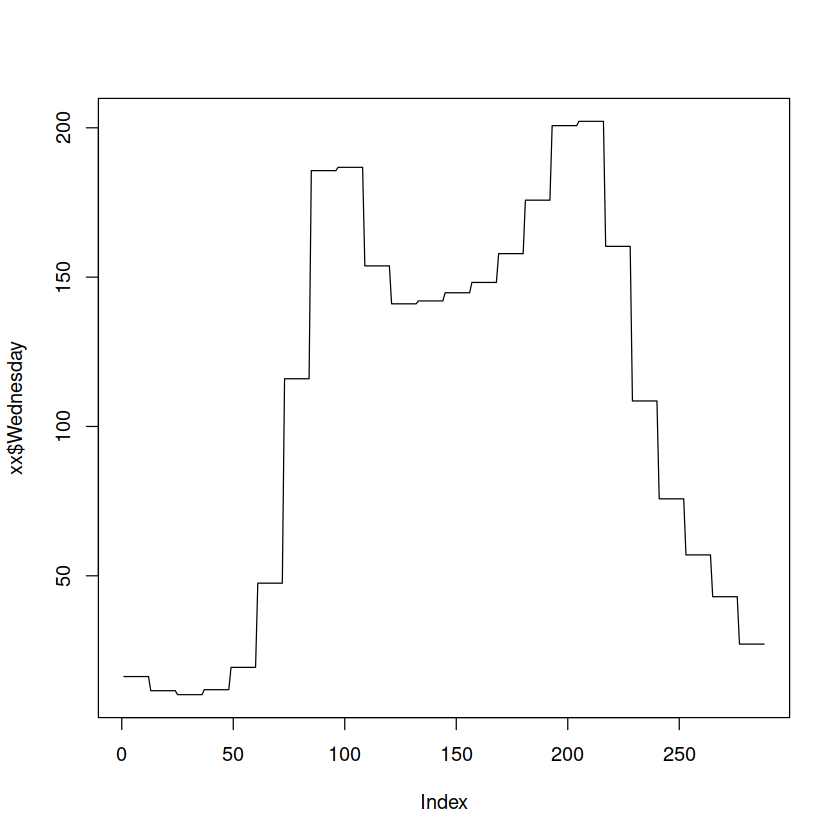

In [73]:
# new
plot(xx$Wednesday, type="l")

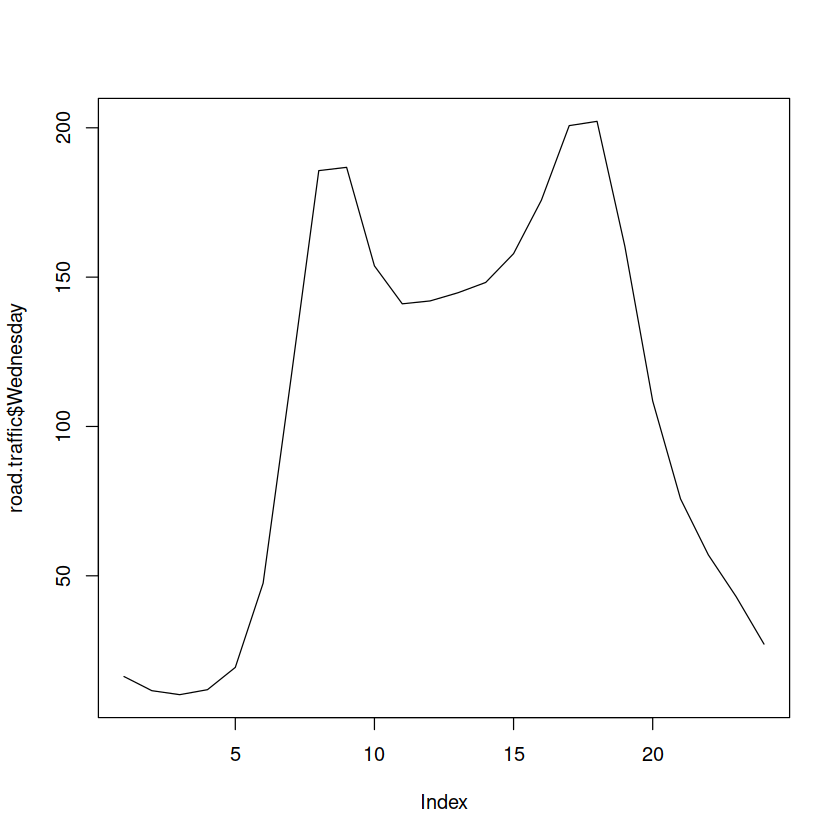

In [74]:
# orig
plot(road.traffic$Wednesday, type="l")

null device 
          1

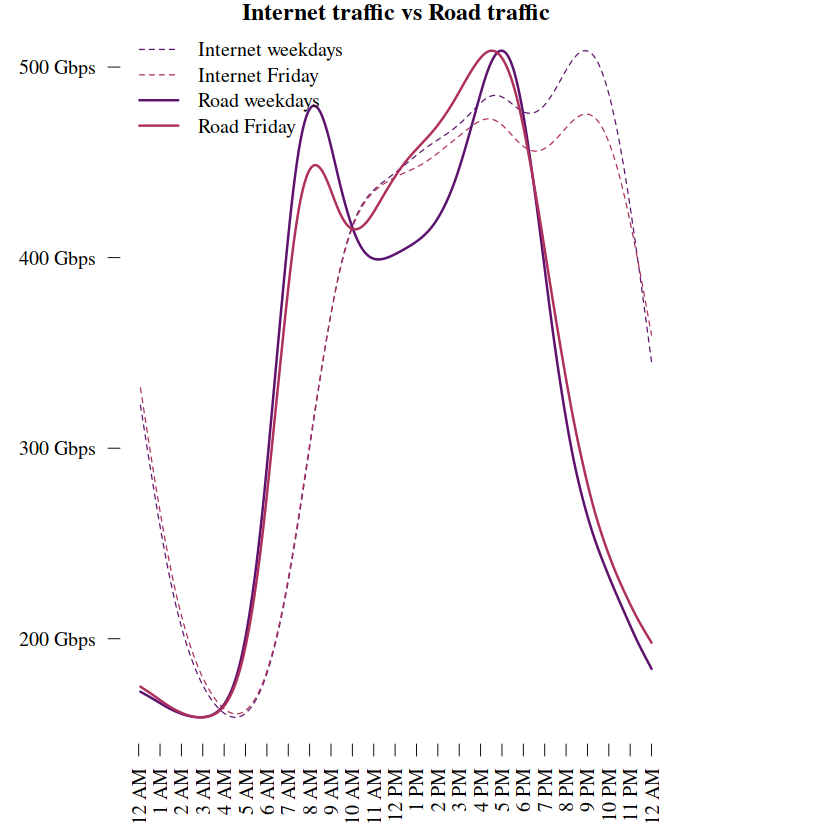

In [75]:
df=16
stag <- seq(0, 288, 12) # mark hours 12am - 11pm
hour <- c(paste(c(12, 1:11), "AM"), paste(c(12, 1:11), "PM"), "12 AM")

#png(filename="img/traffic_vs_road.png", width = 614, height= 307)
par(mar=c(4,5,1,7), family = "serif")
plot(col="#5d126e", smooth.spline(mid.week, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=2, lwd=1)
lines(col="#ae305c", smooth.spline(week.profile[6, ], df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", family="serif", lty=2, lwd=1)
axis(2, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 Gbps", "300 Gbps", "400 Gbps", "500 Gbps"))
              
par(new=T)
plot(col="#5d126e", smooth.spline(rowMeans(xx[, 3:5]), df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
axis(1, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=stag, labels=hour)
par(new=T)
plot(col="#ae305c", smooth.spline(xx$Friday, df=df), type="l", xlab="", cex.lab=0.75, ylab="", bty="n", axes=F, family="serif", lty=1, lwd=2)
#axis(2, side=4, tick=T, lwd=0, lwd.ticks=0.75, cex.axis=1, family="serif", las=2, at=c(200, 300, 400, 500), labels=c("200 People", "300 People", "400 People", "500 People"))
legend("topleft",
  legend = c("Internet weekdays", "Internet Friday", "Road weekdays", "Road Friday"),
  col = c("#5d126e", "#ae305c", "#5d126e", "#ae305c"), 
  lty=c("dashed", "dashed", "solid", "solid"),
  lwd=c(1,1,2,2),
  bty = "n", 
  pt.cex = 1, 
  cex = 1, 
  text.col = "black", 
  horiz = F , 
  inset = c(0, 0))
title("Internet traffic vs Road traffic")
dev.off()

# select highways england data (london)

In [76]:
#highways.eng <- read.csv()

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : argument "file" is missing, with no default
